In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import re
from wordcloud import WordCloud
import ast

In [3]:
df = pd.read_csv('Swiggy_dataset.csv')

 

In [4]:
df.head()

,type,id,name,uuid,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,address,locality,unserviceable,veg,City
0,F,37933,Faasos - Wraps & Rolls,6fe9caf1-02a7-4e66-83bb-1b4ff296b683,Ahmedabad,Vastrapur,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,₹200 FOR TWO,44,44,44,SHOP NO 2 HOTEL SHAHI PALACE VASTRAPUR LAKE AH...,HOTEL SHAHI PALACE,False,False,NaN
1,F,81814,Burger King,10083576-d32d-4a0e-8a82-3236ef342a19,Ahmedabad,Ellisbridge,4.2,1000+ ratings,['American' 'Fast Food'],₹350 FOR TWO,33,33,33,SHOP # 5 GR FLR THIRD EYE 2PANCHAVATI CIRCLE O...,3rd Eye II Ellis Bridge CG Road,False,False,NaN
2,F,107046,Mahalaxmi Pav Bhaji,fbfe3bfa-03fd-4708-b913-06e2c9ee9639,Ahmedabad,Ellisbridge,4.3,500+ ratings,['North Indian'],₹200 FOR TWO,28,28,28,GF 9/10 Dev complexnear parimal charasta opp. ...,C G Road,False,True,NaN
3,F,328315,HIIT Meals,81ab4019-2445-4aef-aff2-04beccd641d9,Ahmedabad,Vishala,--,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,₹150 FOR TWO,51,51,51,C11 Rajyash Rise Near Vishala Restaurant Vasna...,Vasna,False,False,NaN
4,F,108879,Jay Jalaram Parotha House,994e73e1-7c7c-4ad9-87e7-ecfecd4e36fa,Ahmedabad,Ellisbridge,3.9,100+ ratings,['North Indian'],₹250 FOR TWO,29,29,29,Capital Commercial Centre Near UCO Bank Ashram...,Ashram Road,False,True,NaN


In [5]:
columns_to_drop = ["uuid","address","City"]
df.drop(columns_to_drop,axis=1,inplace=True)

In [6]:
df.head()

,type,id,name,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,locality,unserviceable,veg
0,F,37933,Faasos - Wraps & Rolls,Ahmedabad,Vastrapur,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,₹200 FOR TWO,44,44,44,HOTEL SHAHI PALACE,False,False
1,F,81814,Burger King,Ahmedabad,Ellisbridge,4.2,1000+ ratings,['American' 'Fast Food'],₹350 FOR TWO,33,33,33,3rd Eye II Ellis Bridge CG Road,False,False
2,F,107046,Mahalaxmi Pav Bhaji,Ahmedabad,Ellisbridge,4.3,500+ ratings,['North Indian'],₹200 FOR TWO,28,28,28,C G Road,False,True
3,F,328315,HIIT Meals,Ahmedabad,Vishala,--,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,₹150 FOR TWO,51,51,51,Vasna,False,False
4,F,108879,Jay Jalaram Parotha House,Ahmedabad,Ellisbridge,3.9,100+ ratings,['North Indian'],₹250 FOR TWO,29,29,29,Ashram Road,False,True


In [7]:
df=df.dropna(subset=["veg"])
# df['veg'] = df['veg'].astype(int)

In [8]:
df['veg'] = df['veg'].astype(int)
df['unserviceable'] = df['unserviceable'].astype(int)

In [9]:
df.head()

,type,id,name,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,locality,unserviceable,veg
0,F,37933,Faasos - Wraps & Rolls,Ahmedabad,Vastrapur,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,₹200 FOR TWO,44,44,44,HOTEL SHAHI PALACE,0,0
1,F,81814,Burger King,Ahmedabad,Ellisbridge,4.2,1000+ ratings,['American' 'Fast Food'],₹350 FOR TWO,33,33,33,3rd Eye II Ellis Bridge CG Road,0,0
2,F,107046,Mahalaxmi Pav Bhaji,Ahmedabad,Ellisbridge,4.3,500+ ratings,['North Indian'],₹200 FOR TWO,28,28,28,C G Road,0,1
3,F,328315,HIIT Meals,Ahmedabad,Vishala,--,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,₹150 FOR TWO,51,51,51,Vasna,0,0
4,F,108879,Jay Jalaram Parotha House,Ahmedabad,Ellisbridge,3.9,100+ ratings,['North Indian'],₹250 FOR TWO,29,29,29,Ashram Road,0,1


In [10]:
grouped =  df.groupby('city')
print(grouped)

In [11]:
list[grouped]

list[<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001E0888C5E40>]

In [12]:
for city, group in grouped:
    print(f"city: {city}")
    print(group)
    print()

city: Ahmedabad
    type      id                         name       city         area  \
0      F   37933       Faasos - Wraps & Rolls  Ahmedabad    Vastrapur   
1      F   81814                  Burger King  Ahmedabad  Ellisbridge   
2      F  107046          Mahalaxmi Pav Bhaji  Ahmedabad  Ellisbridge   
3      F  328315                   HIIT Meals  Ahmedabad      Vishala   
4      F  108879    Jay Jalaram Parotha House  Ahmedabad  Ellisbridge   
..   ...     ...                          ...        ...          ...   
714    F  386004          Sher-e-punjab dhaba  Ahmedabad   Chandkheda   
715    F  179449  Jay Ambe Bhajipav And Pulav  Ahmedabad       Motera   
716    F  389104          Hari Om Kathiyawadi  Ahmedabad   Chandkheda   
717    F   58818                Test Of Spice  Ahmedabad       Motera   
718    F  425161     Rolls and Rolls and More  Ahmedabad   Chandkheda   

    avgRating totalRatingsString  \
0         4.2       500+ ratings   
1         4.2      1000+ ratings   

## Number of metro cities having Restaurants listed by swiggy

In [13]:
unique_cities = df['city'].unique()

print("List of cities:")
for city in unique_cities:
    print(city)

List of cities:
Ahmedabad
Bangalore
Chennai
Delhi
Hyderabad
Kolkata
Mumbai
Pune
Surat


## The number of restaurants in different cities 

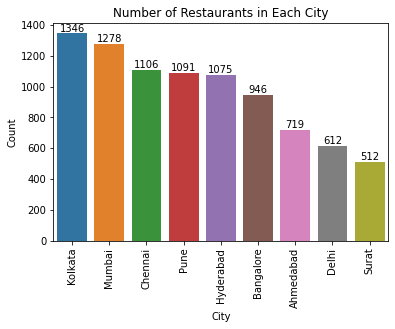

In [14]:
# sns.countplot(x='city', data=df)
# plt.xticks(rotation=90)
# plt.xlabel('City')
# plt.ylabel('Count')
# plt.title('Number of Restaurants in Each City')
# plt.show()

df_sorted = df['city'].value_counts().reset_index()
df_sorted.columns = ['city', 'count']

# Create the count plot
ax = sns.countplot(x='city', data=df, order=df_sorted['city'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Restaurants in Each City')

# Add values on each bar using plt.bar_label
bars = plt.bar_label(ax.containers[0], fmt='%d', fontsize=10, label_type='edge')

plt.show()


distribution of vegetarian and non-vegetarian restaurants in different cities

Ratio of Veg to Non-veg in Ahmedabad: 1.14
Ratio of Veg to Non-veg in Bangalore: 0.31
Ratio of Veg to Non-veg in Chennai: 0.30
Ratio of Veg to Non-veg in Delhi: 0.32
Ratio of Veg to Non-veg in Hyderabad: 0.35
Ratio of Veg to Non-veg in Kolkata: 0.21
Ratio of Veg to Non-veg in Mumbai: 0.24
Ratio of Veg to Non-veg in Pune: 0.30
Ratio of Veg to Non-veg in Surat: 1.00


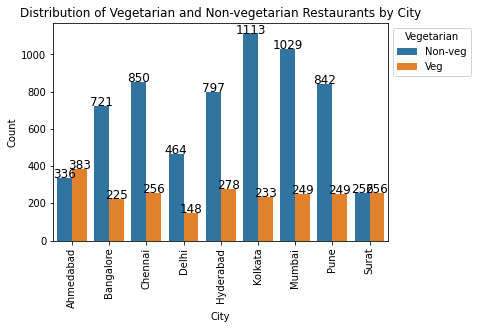

In [15]:
# sns.countplot(x='city', hue='veg', data=df)
# plt.xticks(rotation=90)
# plt.xlabel('City')
# plt.ylabel('Count')
# plt.title('Distribution of Vegetarian and Non-vegetarian Restaurants by City')
# plt.legend(title='Vegetarian', loc='upper right')
# plt.show()

# sns.set(style="whitegrid")
ax = sns.countplot(x='city', hue='veg', data=df, dodge=True)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Vegetarian and Non-vegetarian Restaurants by City')

plt.legend(title='Vegetarian', loc='upper left', bbox_to_anchor=(1, 1), labels=['Non-veg', 'Veg'])

# Add bar labels with adjusted positions
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', size=12)
for city in df['city'].unique():
    veg_count = df[(df['city'] == city) & (df['veg'] == 1)]['veg'].count()
    non_veg_count = df[(df['city'] == city) & (df['veg'] == 0)]['veg'].count()
    ratio = veg_count / non_veg_count
    print(f'Ratio of Veg to Non-veg in {city}: {ratio:.2f}')
plt.show()

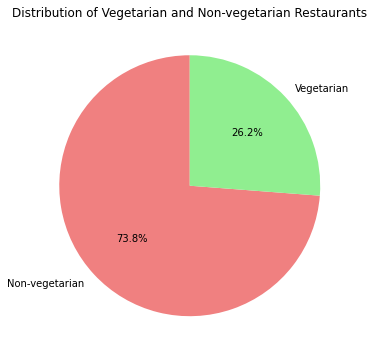

In [16]:
veg_counts = df['veg'].value_counts()
labels = [ 'Non-vegetarian','Vegetarian']
sizes = veg_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Vegetarian and Non-vegetarian Restaurants')

plt.show()

AVERAGE COST OF TWO BY CITY

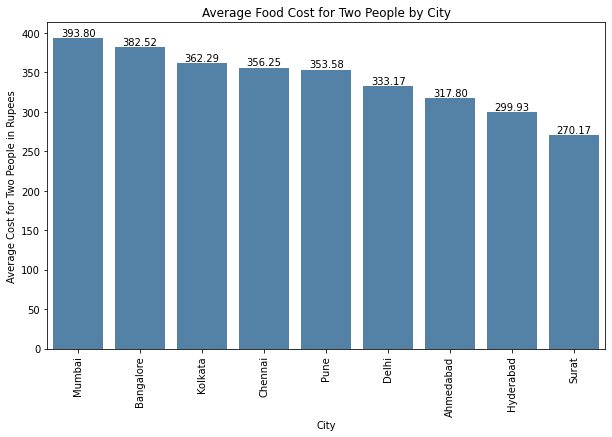

In [17]:
# Use regular expression to extract numeric values
# pattern = r'(\d+)'
# df['costForTwo'] = df['costForTwoStrings'].str.extract(pattern)

# # Convert 'costForTwo' to numeric
# df['costForTwo'] = pd.to_numeric(df['costForTwo'], errors='coerce')

# # Calculate the average cost for two by city
# city_avg_cost = df.groupby('city')['costForTwo'].mean().sort_values(ascending=False)

# # Create the bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x=city_avg_cost.index, y=city_avg_cost.values)
# plt.xticks(rotation=90)
# plt.xlabel('City')
# plt.ylabel('Average Cost for Two')
# plt.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, label_type='edge')
# plt.title('Average Cost for Two by City')
# plt.show()
pattern = r'(\d+)'
df['costForTwo'] = df['costForTwoStrings'].str.extract(pattern)

# Convert 'costForTwo' to numeric
df['costForTwo'] = pd.to_numeric(df['costForTwo'], errors='coerce')
city_avg_cost = df.groupby('city')['costForTwo'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_avg_cost.index, y=city_avg_cost.values, color='steelblue')  # Change bar color if needed
plt.xticks(rotation=90)
plt.yticks()
plt.xlabel('City', color='black')
plt.ylabel('Average Cost for Two People in Rupees', color='black')

# Add bar labels
for idx, value in enumerate(city_avg_cost):
    plt.annotate(f'{value:.2f}', (idx, value), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Food Cost for Two People by City', color='black')
plt.show()









In [18]:
df = df[df['avgRating'] != 0]

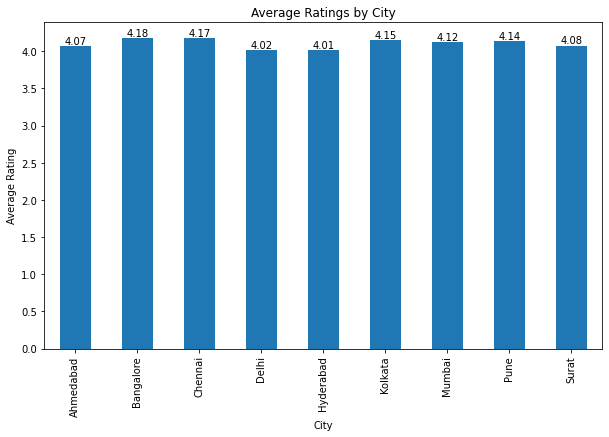

In [19]:
df['avgRating'] = pd.to_numeric(df['avgRating'], errors='coerce')

# Calculate the average ratings by city
city_avg_ratings = df.groupby('city')['avgRating'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = city_avg_ratings.plot(kind='bar')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')

# Add values on each bar using plt.bar_label
bars = plt.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, label_type='edge')

plt.show()

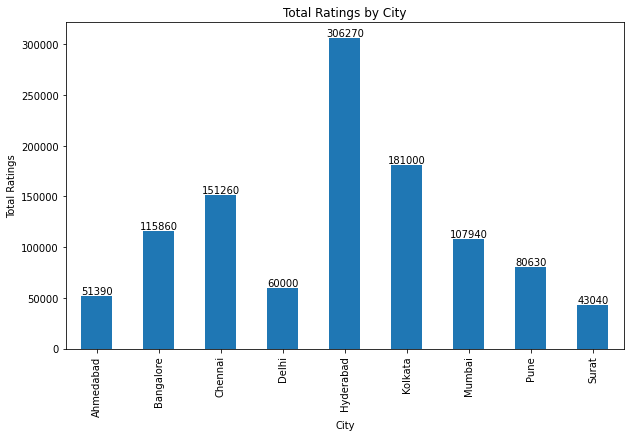

In [20]:
df['totalRatings'] = df['totalRatingsString'].str.extract('(\d+)').fillna(0).astype(int)

# Group by city and sum the total ratings
city_total_ratings = df.groupby('city')['totalRatings'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = city_total_ratings.plot(kind='bar')
plt.title('Total Ratings by City')
plt.xlabel('City')
plt.ylabel('Total Ratings')

# Add values on each bar using plt.bar_label
bars = plt.bar_label(ax.containers[0], fmt='%d', fontsize=10, label_type='edge')

plt.show()

DATA ANALYSIS IN PARTICULAR CITIES


Bar Chart for Average Rating of top 10 Restaurants in Particular city

In [21]:
# # 1. 
# def Return_top_10_restaurants(city):
#     city_data = df[df['city'] == city]

   
#     city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(int)


#     city_data = city_data[city_data['totalRatings'] > 100]


#     top_n = 10  
#     top_restaurants = city_data.nlargest(top_n, 'avgRating')

#     # Create a bar plot
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='name', y='avgRating', data=top_restaurants)
#     plt.xticks(rotation=90)
#     plt.title(f'Top {top_n} Restaurants by Average Rating in {city}')
#     plt.show()
    

def Return_top_10_restaurants(city):
    city_data = df[df['city'] == city]

    # Clean the 'totalRatingsString' column by filling NaN values with '0'
    city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')

    # Extract and convert the ratings to integers, while handling NaN values
    city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

    city_data = city_data[city_data['totalRatings'] > 100]

    top_n = 10
    top_restaurants = city_data.nlargest(top_n, 'avgRating')

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='name', y='avgRating', data=top_restaurants)
    
    plt.xticks(rotation=90)
    plt.title(f'Top {top_n} Restaurants by Average Rating in {city}')
    plt.ylabel("Average Rating Of Restaurant")
    plt.xlabel("Restaurant Name")
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.show()


Cost For Two In A Particular Cities

In [22]:


# def Cost_for_Two(city):
#     data = df[df['city'] == city]

#     sns.boxplot(y='costForTwo', data=data)
#     plt.title('Box Plot of Cost for Two in '+ str(city))
#     plt.show()
def Cost_for_Two(city):
    data = df[df['city'] == city]

    # Calculate the mean
    mean_cost = data['costForTwo'].mean()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y='costForTwo', data=data)
    
    # Add the mean as text to the plot
    plt.text(0.8, mean_cost, f'Mean: {mean_cost:.2f}RS', fontsize=12, color='red', verticalalignment='center')
    
    plt.title('Box Plot of Cost for Two in ' + str(city))
    plt.ylabel("Cost For Two People (Rs)")
    plt.show()

Bar Chart for Average Rating vs. Cost for Two in a city

In [23]:

# def Avg_rating_vs_CostForTwo(city):
#     data = df[df['city'] == city]
#     sns.scatterplot(x='avgRating', y='costForTwo', data=data)
#     plt.title('Scatter Plot: Average Rating vs. Cost for Two in '+ city)
#     plt.show()

Distribution of Average Ratings in a city

In [24]:


# def Distribution_of_AvgRatings(city):
#     data = df[df['city'] == city]
#     sns.histplot(data['avgRating'], bins=20, kde=True)
#     plt.title('Distribution of Average Ratings in '+ city)
#     plt.show()
def Distribution_of_AvgRatings(city):
    data = df[df['city'] == city]

    # Create a histogram with values on each bar
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data['avgRating'], bins=20, kde=True)

    # Calculate the count for each bar in the histogram
    counts, bins, _ = plt.hist(data['avgRating'], bins=20)

    # Add values on each bar using plt.bar_label
    plt.bar_label(ax.containers[0], labels=counts, fontsize=10, label_type='edge')
    plt.xlabel(f"Average ratings Of Restaurants in {city}")
    # plt.ylabel()
    plt.title('Distribution of Average Ratings in ' + city)
    plt.show()

count of Vegetarian and Non-vegetarian Restaurants in a city

In [25]:

def Veg_Nonveg_pieChart(city):
    data = df[df['city'] == city]
    veg_counts = data['veg'].value_counts()

    # Create labels for the pie chart
    labels = ['Non-vegetarian', 'Vegetarian']

    # Create a pie chart
    plt.pie(veg_counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
    plt.title('Distribution of Vegetarian and Non-vegetarian Restaurants in '+city)
    plt.show()

Box Plot for Average Ratings by Veg/Non-veg

In [26]:
def AvgRating_By_veg_non_veg(city):
    data = df[df['city'] == city]
    sns.boxplot(x='veg', y='avgRating', data=data,showmeans=True)
    plt.title('Average Ratings by Veg/Non-veg in '+city)
    plt.xticks([0, 1], ['Non-veg', 'Veg'])
    plt.show()


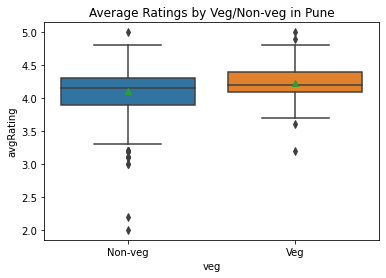

In [27]:
AvgRating_By_veg_non_veg("Pune")

Scatter Plot for Average Rating vs. Total Ratings

In [28]:
# def Avg_rating_vs_total_Ratings(city):
#     data = df[df['city'] == city]
#     sns.scatterplot(x='avgRating', y='totalRatingsString', data=data)
#     plt.title('Scatter Plot: Avg Rating vs. Total Ratings in '+city)
#     plt.show()

Delivery Time Distribution

In [29]:

def Time_Distribution(city):
    data = df[df['city'] == city]
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='deliveryTime', data=data)
    plt.title('Count of Restaurants in Different Delivery Time Categories (Large Bar Plot)')
    plt.xticks(rotation=0)
    plt.figure(figsize=(36, 12))
    # Add bar labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.show()


Correlation Heatmap for numeric columns

In [30]:
# def Correlation_of_numeric_columns(city):
#     data = df[df['city'] == city]
#     numeric_columns = ['avgRating', 'totalRatingsString', 'costForTwoStrings', 'deliveryTime']
#     correlation_matrix = data[numeric_columns].corr()
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#     plt.title('Correlation Heatmap of Numeric Columns in '+city)
#     plt.show()

 Area-wise Distribution of Restaurants:


In [31]:
def Area_wise_distribution(city):
    data = df[df['city'] == city]
    plt.figure(figsize=(24,12))
    sns.countplot(x='area', data=data, order=data['area'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Number of Restaurants in Different Areas of '+city)
    plt.show()

top 10 restaurants

In [32]:
def Top_Performing_areasInAcity(city):
    data = df[df['city'] == city]
    data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

    # Filter restaurants with total ratings greater than 100 and exclude 'Ahmedabad' area
    filtered_data = data[(data['totalRatings'] > 100) & (data['area'] != 'Ahmedabad')]

    # Group data by 'area' and calculate the average rating
    area_avg_ratings = filtered_data.groupby('area')['avgRating'].mean().reset_index()

    # Sort areas by average rating in descending order and get the top 10
    top_10_areas = area_avg_ratings.sort_values(by='avgRating', ascending=False).head(10)

    # Create a bar chart for the top 10 performing areas
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_areas['area'], top_10_areas['avgRating'], color='skyblue')
    plt.xlabel('Average Rating')
    plt.title('Top 10 Performing Areas in '+city)
    plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rating at the top
    plt.show()

In [33]:
# def CostForTwoReg(city):

#     city_data = df[df['city'] == city]

#     city_data['totalRatings'] = city_data['totalRatingsString'].str.replace('[^\d]', '', regex=True).astype(int)

#     # Preprocess 'costForTwoStrings' column to extract numeric values
#     city_data['costForTwo'] = city_data['costForTwoStrings'].str.extract(r'(\d+)').astype(float)

#     # Select relevant columns for regression
#     selected_columns = ['avgRating', 'totalRatings', 'costForTwo']

#     # Define your dependent variable (y) and independent variables (X)
#     y = city_data['costForTwo']
#     X = city_data[['totalRatings', 'avgRating']]
#     # costForTwo
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create and fit a linear regression model
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Plot the regression graph
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
#     plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
#     plt.xlabel('Actual Cost For Two')
#     plt.ylabel('Predicted Cost For Two')
#     plt.title(f'Regression Graph for '+city)
#     plt.legend()
#     plt.show()

#     print(f'Mean Squared Error: {mse:.2f}')
#     print(f'R-squared: {r2:.2f}')

In [34]:
def Most_costly_area(city):
    city_of_interest = city

    # Filter the dataset for the specific city
    city_data = df[df['city'] == city_of_interest]

    # Preprocess 'costForTwoStrings' column to extract numeric values
    city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)

    # Group data by 'area' and calculate the mean cost for two in each area
    area_cost = city_data.groupby('area')['costForTwo'].mean().reset_index()

    # Sort areas by average cost in descending order to find the top 5 most costly areas
    top_costly_areas = area_cost.nlargest(10, 'costForTwo')

    # Create a bar graph for the top 5 most costly areas
    plt.figure(figsize=(24, 12))
    plt.bar(top_costly_areas['area'], top_costly_areas['costForTwo'], color='skyblue')
    plt.xticks(rotation=45)
    plt.xlabel(f'Areas in {city}')
    plt.ylabel('Average Cost for Two People (Rs)')
    plt.title(f'Top 10 Most Costly Areas in {city_of_interest}')
    plt.show()

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


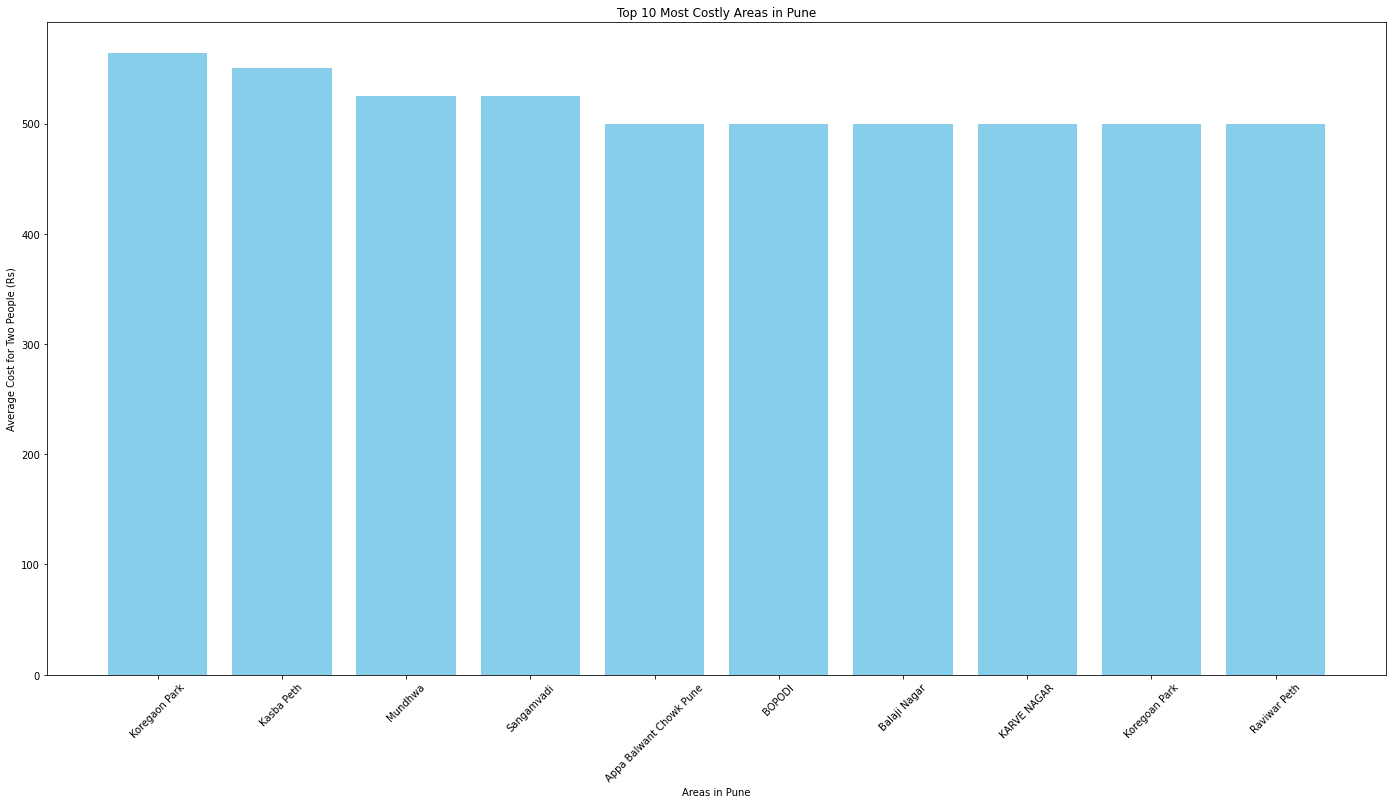

In [35]:
# for city in unique_cities:
Most_costly_area("Pune")

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


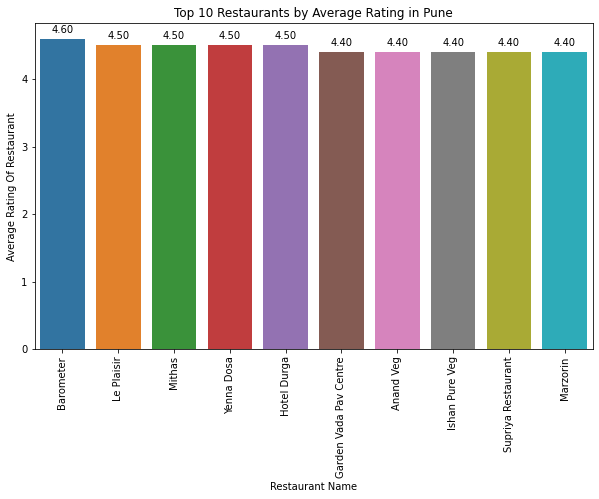

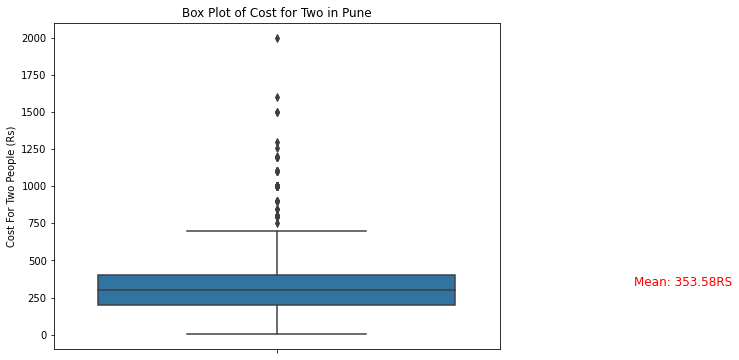

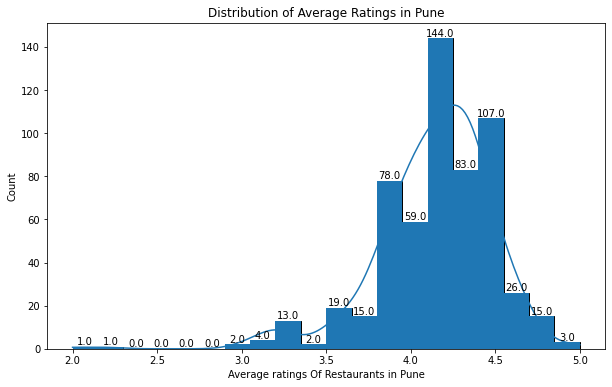

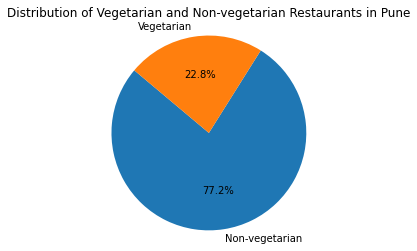

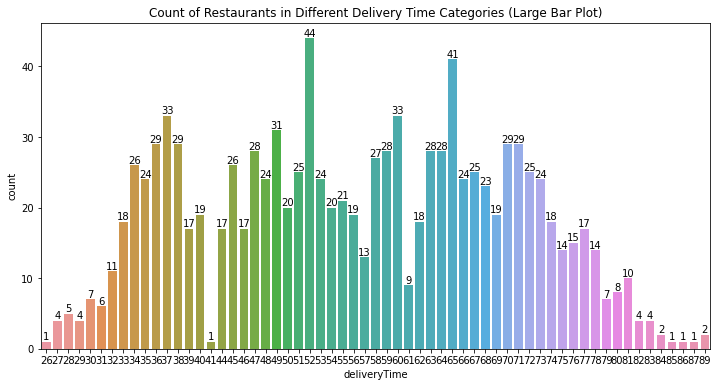

<Figure size 2592x864 with 0 Axes>

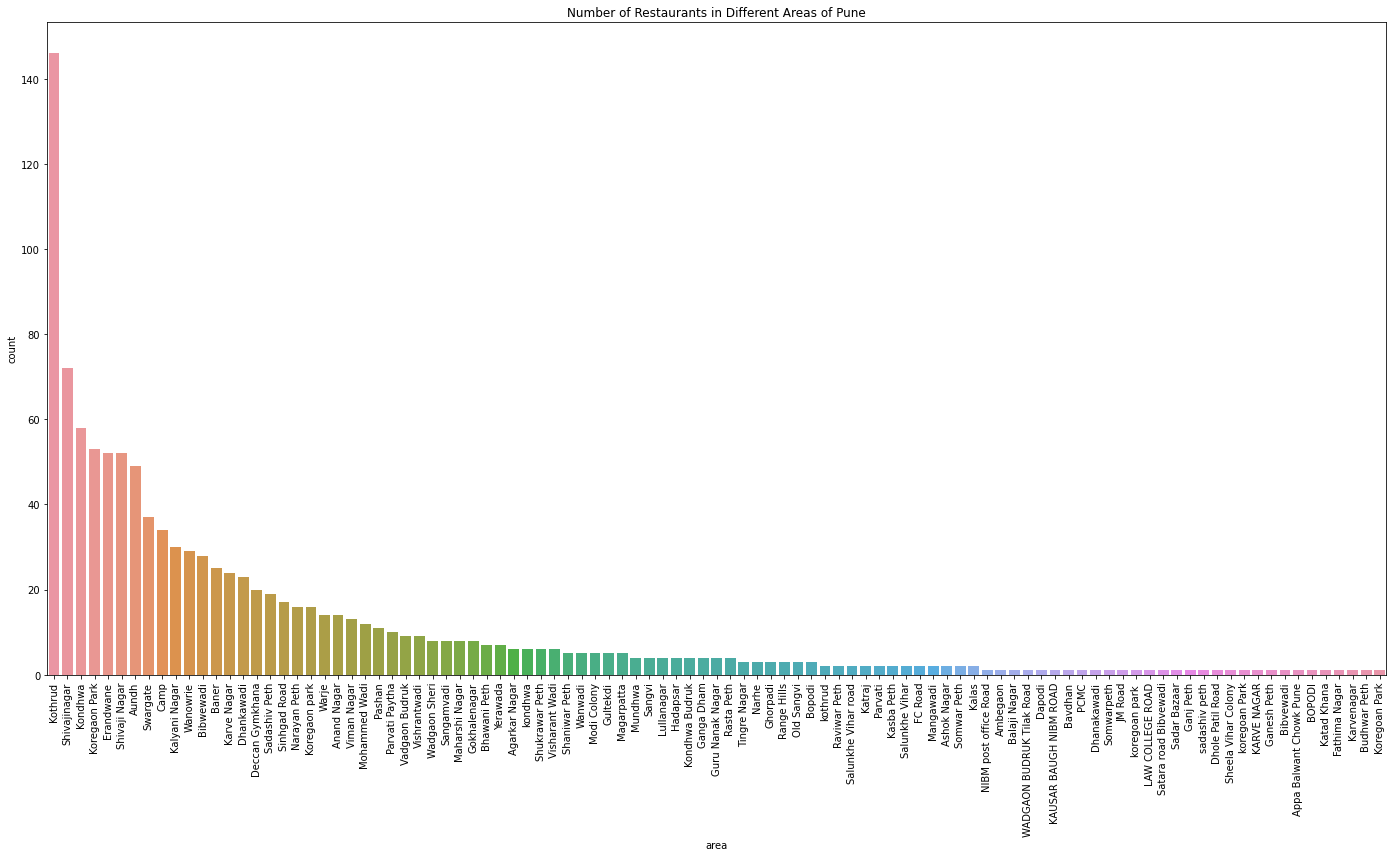

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


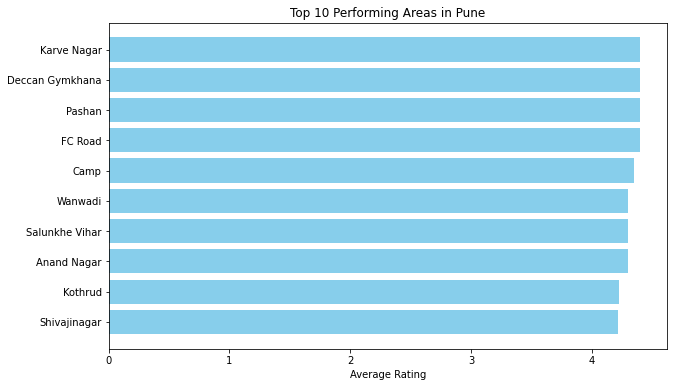

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


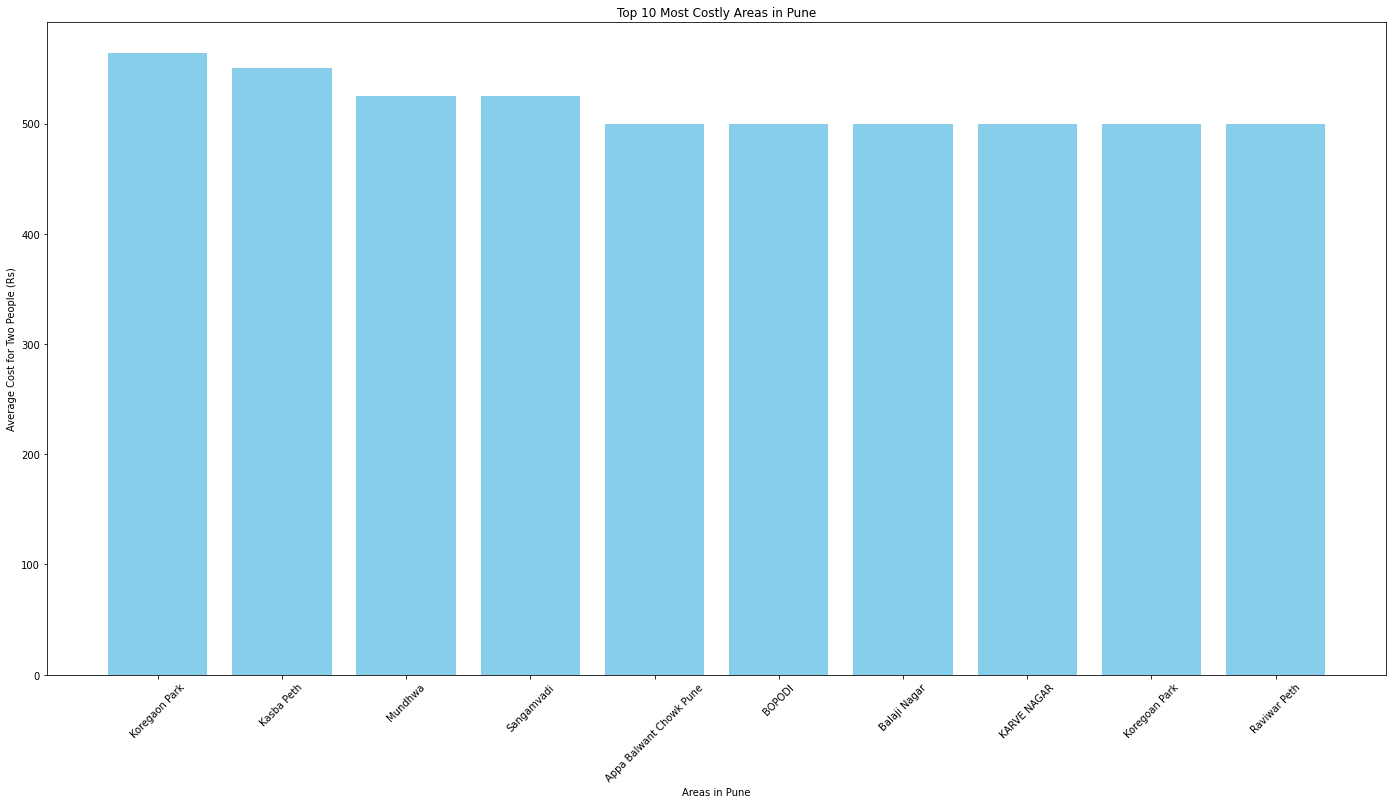

In [36]:
Return_top_10_restaurants("Pune")
Cost_for_Two("Pune")
# Avg_rating_vs_CostForTwo("Pune")
Distribution_of_AvgRatings("Pune")
Veg_Nonveg_pieChart("Pune")
# AvgRating_By_veg_non_veg("Pune")
# Avg_rating_vs_total_Ratings("Pune")
Time_Distribution("Pune")
# Correlation_of_numeric_columns("Pune")
Area_wise_distribution("Pune")
Top_Performing_areasInAcity("Pune")
# CostForTwoReg("Pune")
Most_costly_area("Pune")

In [37]:
def Average_Delivery_Time(city):
    data = df[df['city'] == city]
    average_delivery_time = data['deliveryTime'].mean()
    total_restaurants = len(data)
    # Define a time window around the average delivery time, e.g., +/- 5 minutes
    time_window = 5

    # Calculate the percentage of restaurants delivering around the average delivery time
    around_avg_delivery_time = data[(data['deliveryTime'] >= (average_delivery_time - time_window)) & (data['deliveryTime'] <= (average_delivery_time + time_window))]
    percentage_around_avg = (len(around_avg_delivery_time) / total_restaurants) * 100

    print(f'City: {city}')
    print(f'Average Delivery Time: {average_delivery_time:.2f} minutes')
    print(f'Percentage of Restaurants Delivering around Average Delivery Time: {percentage_around_avg:.2f}%')

cities = df['city'].unique()
for city in cities:
    Average_Delivery_Time(city)

City: Ahmedabad
Average Delivery Time: 44.69 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 40.19%
City: Bangalore
Average Delivery Time: 50.53 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 40.80%
City: Chennai
Average Delivery Time: 58.97 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 25.14%
City: Delhi
Average Delivery Time: 50.77 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 29.58%
City: Hyderabad
Average Delivery Time: 49.93 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 18.98%
City: Kolkata
Average Delivery Time: 67.81 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 24.59%
City: Mumbai
Average Delivery Time: 48.32 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 43.51%
City: Pune
Average Delivery Time: 55.82 minutes
Percentage of Restaurants Delivering around Average Delivery Time: 23.28%


Ahmedabad


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


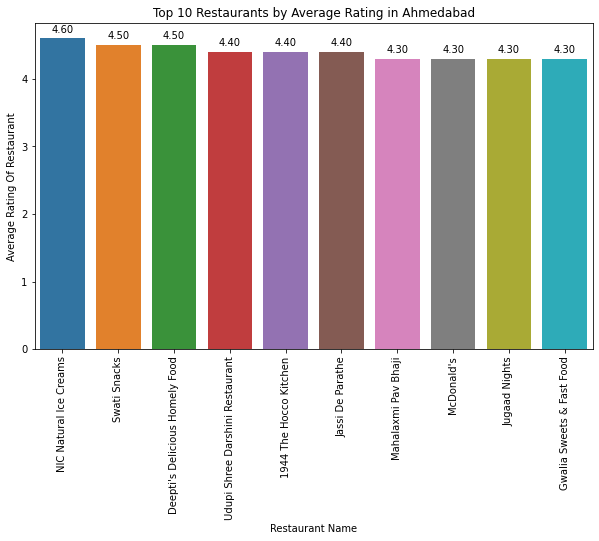

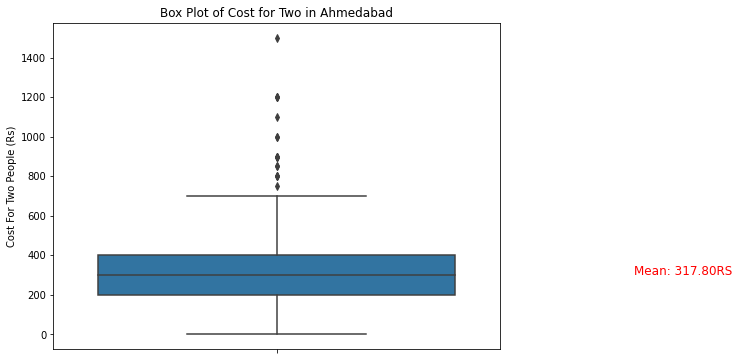

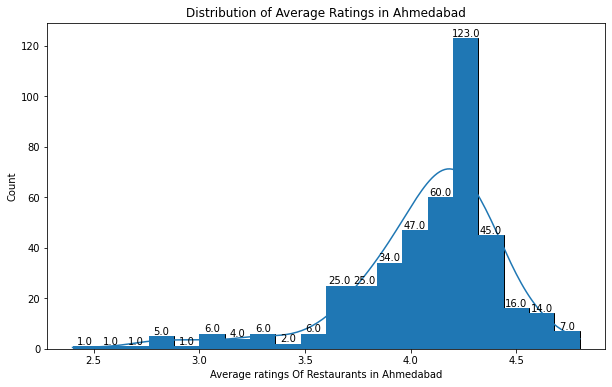

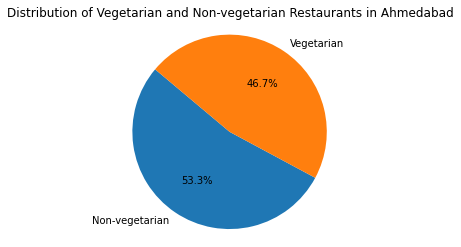

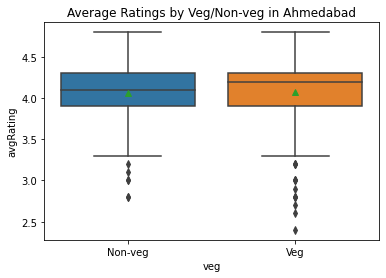

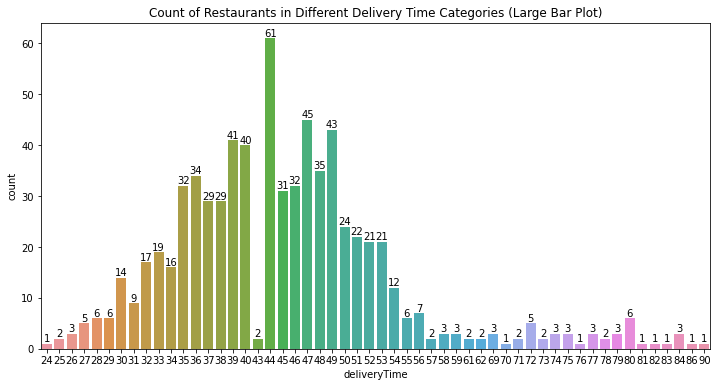

<Figure size 2592x864 with 0 Axes>

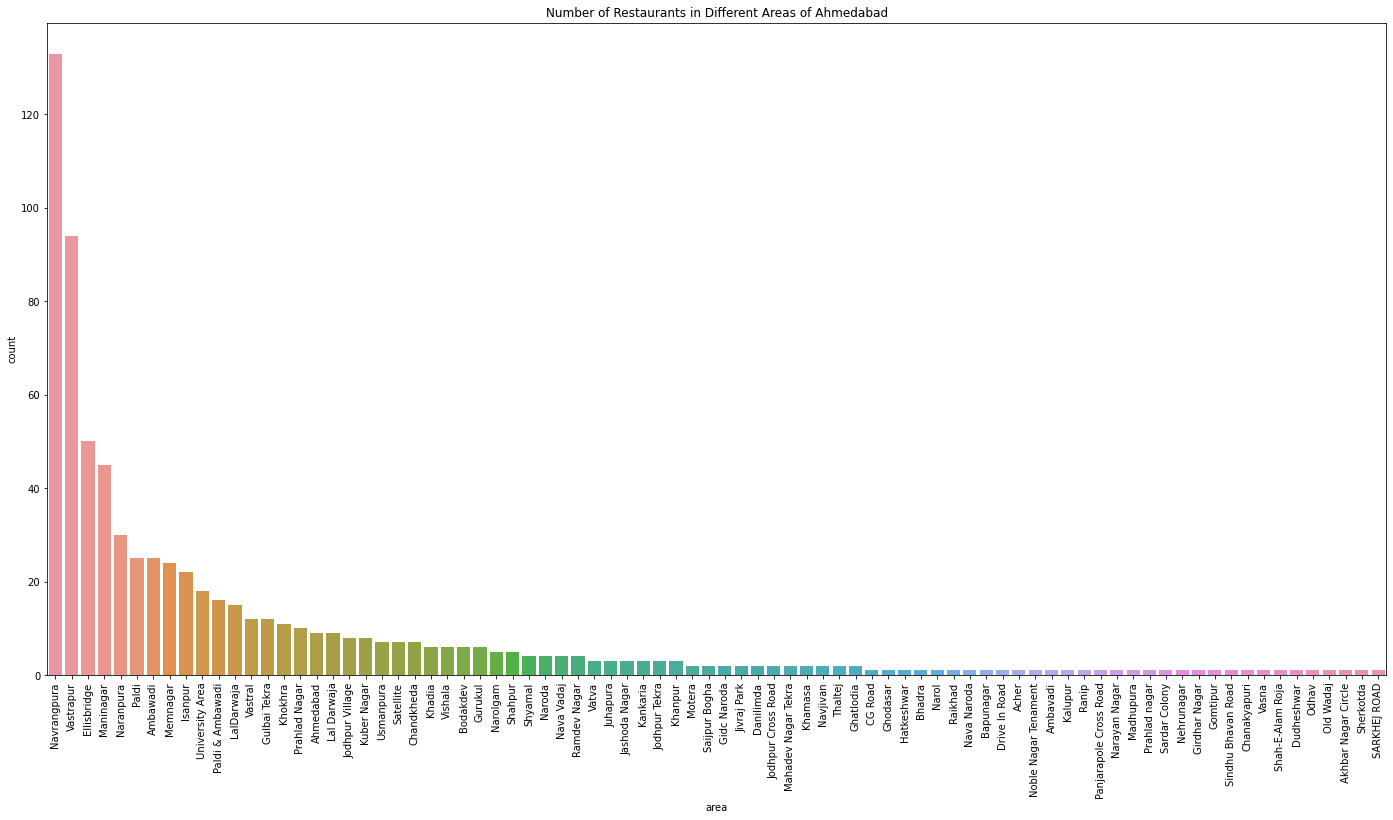

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


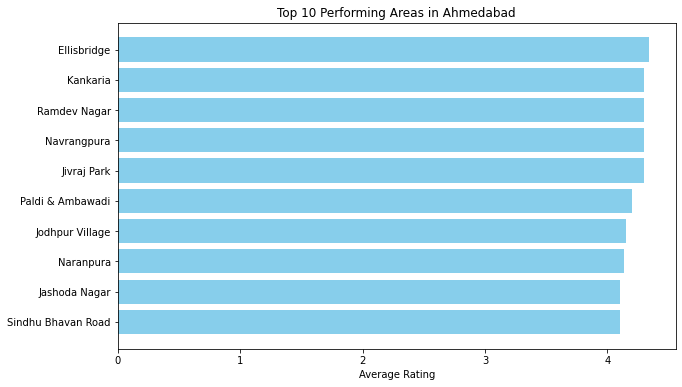

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


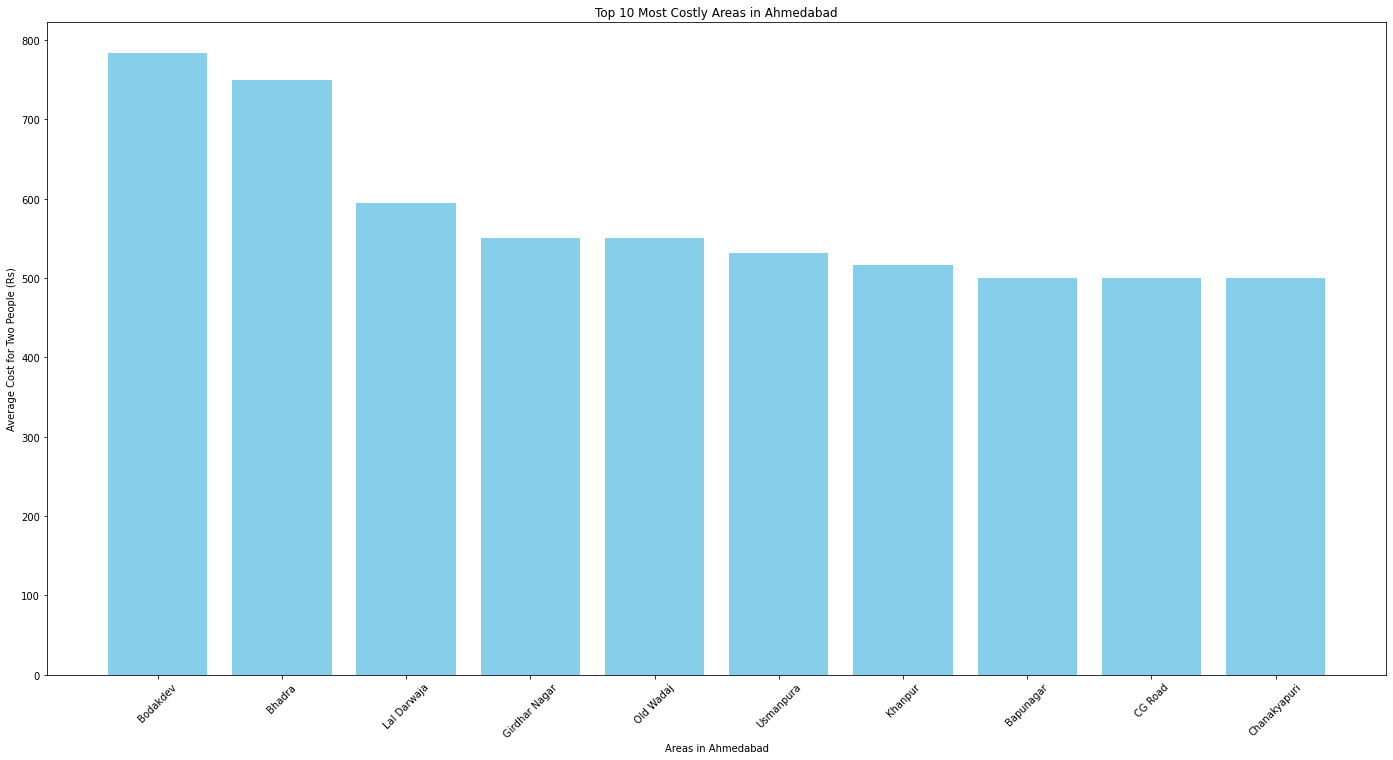

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


Bangalore


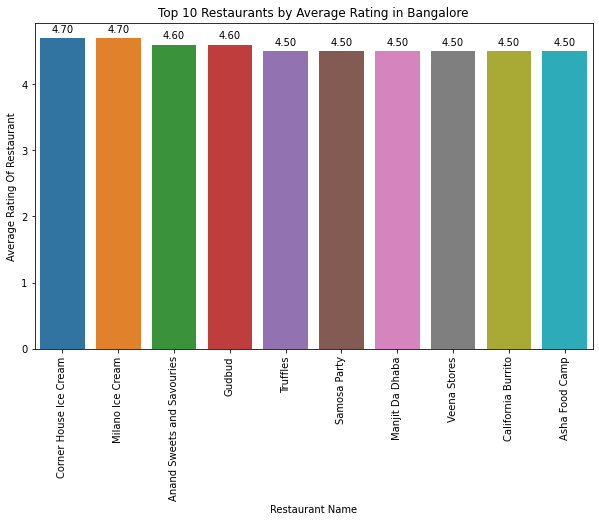

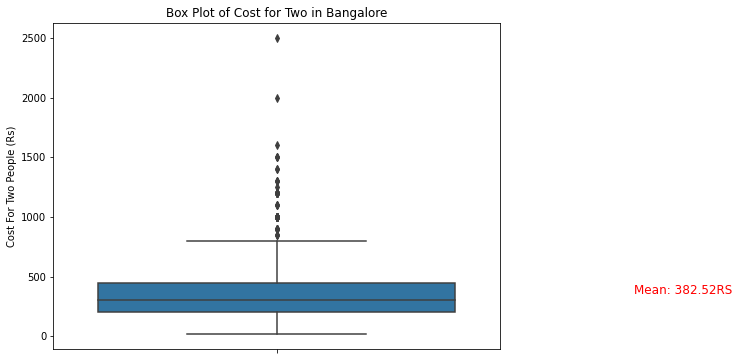

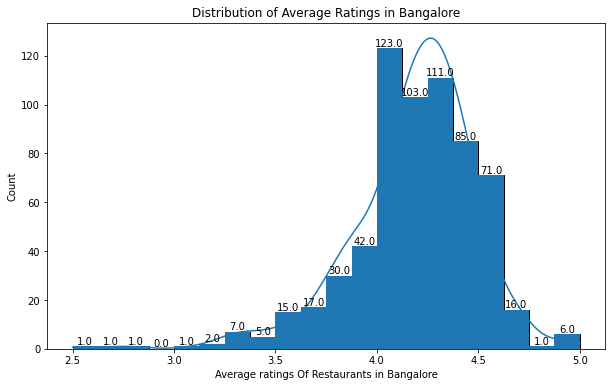

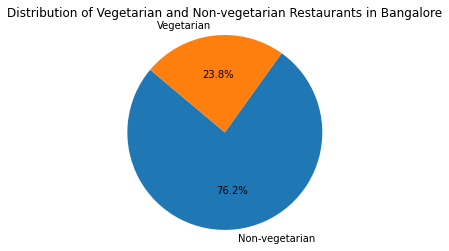

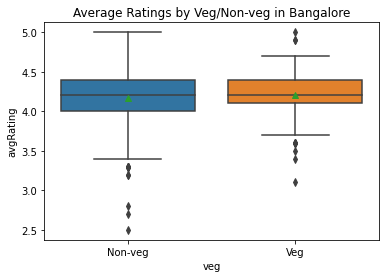

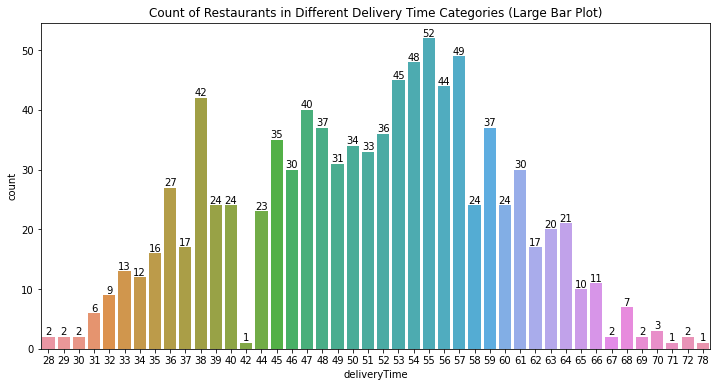

<Figure size 2592x864 with 0 Axes>

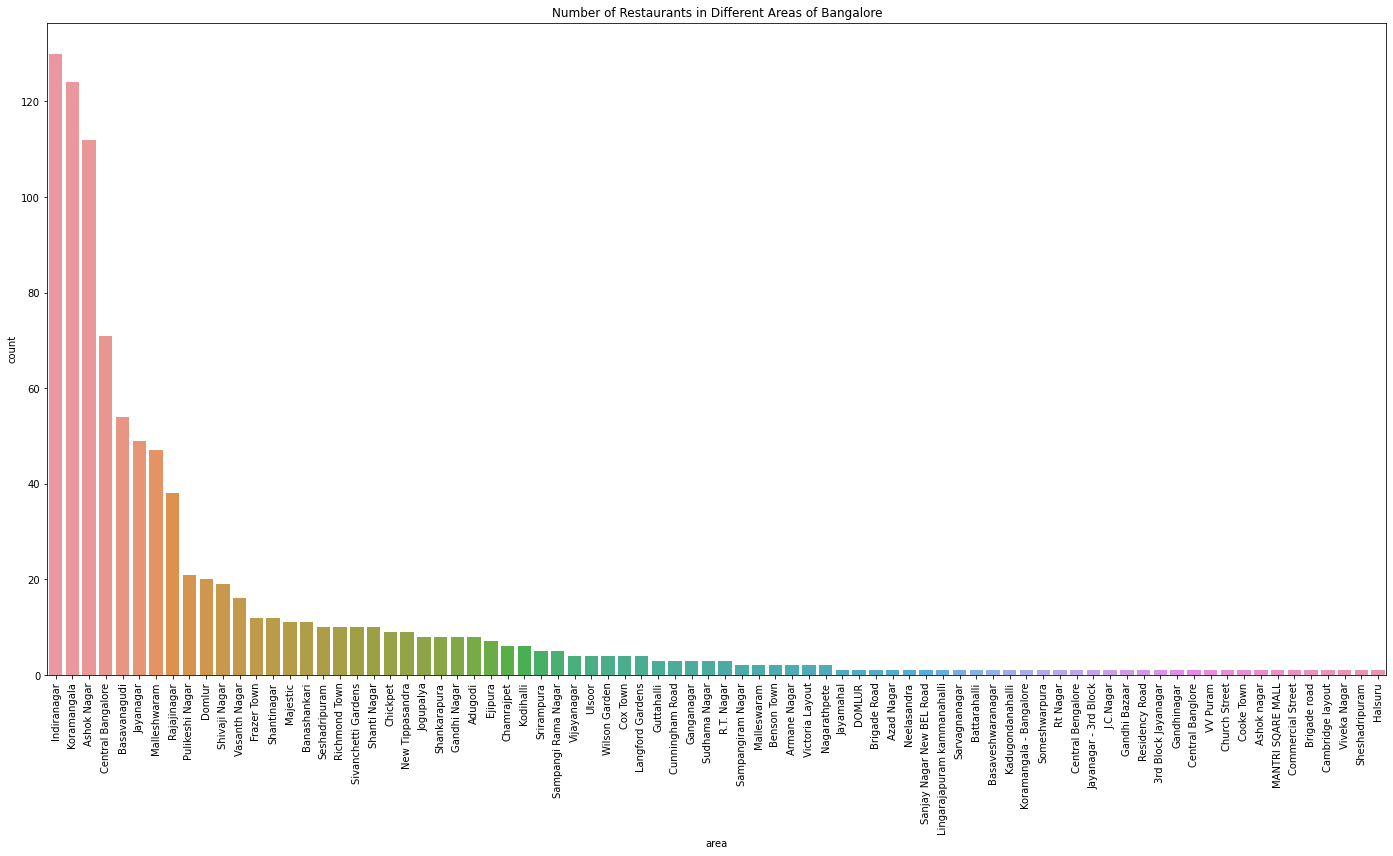

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


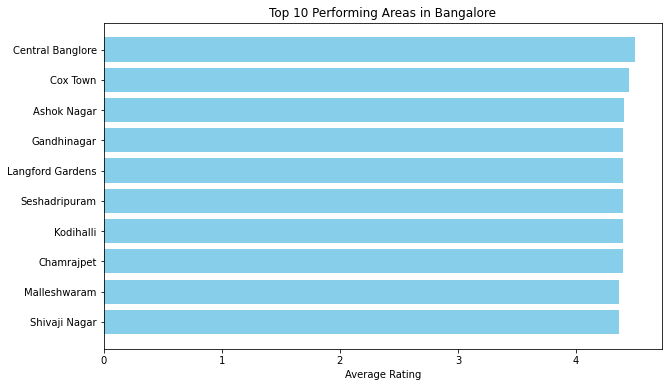

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


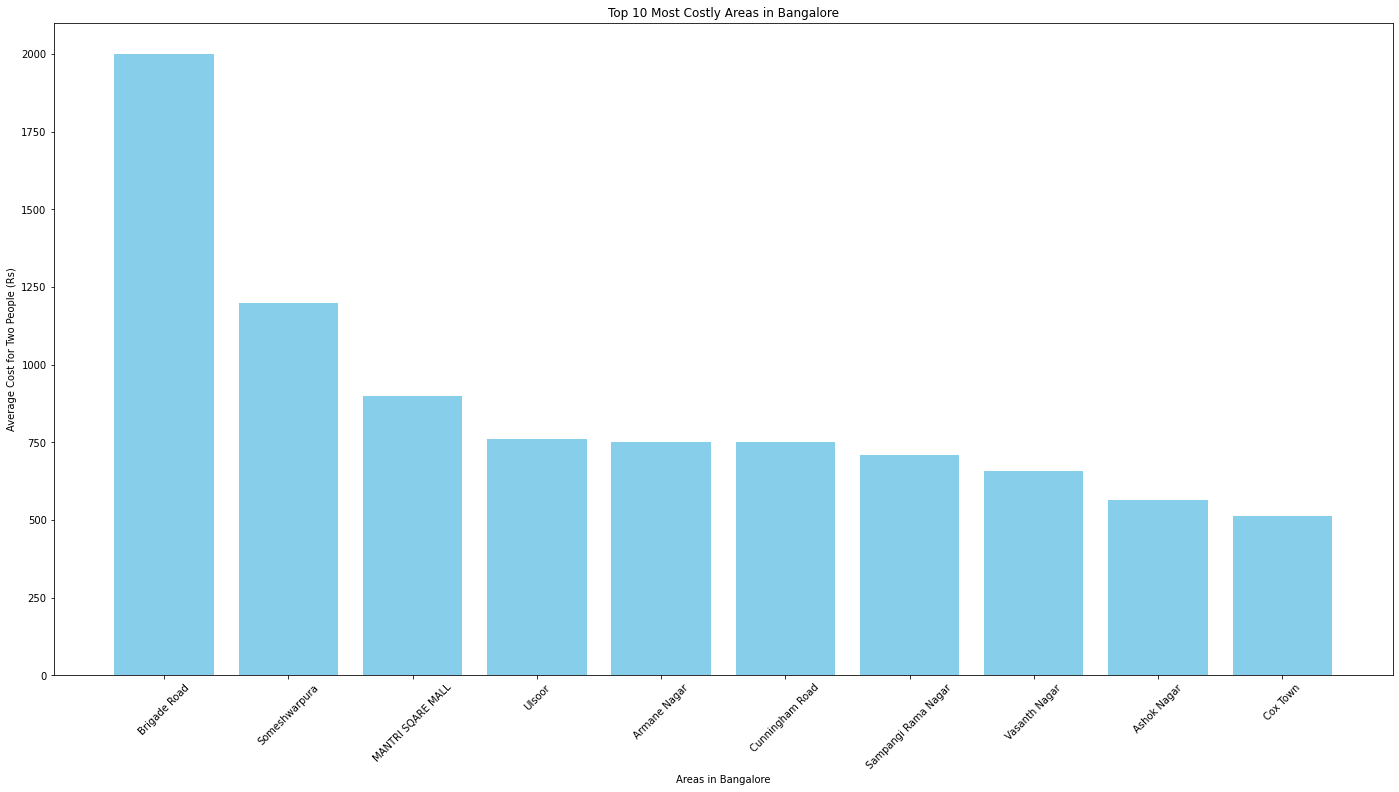

Chennai


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


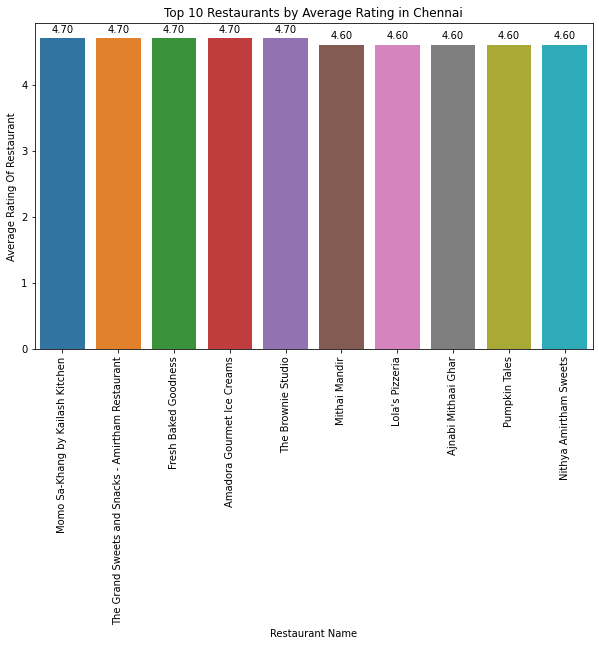

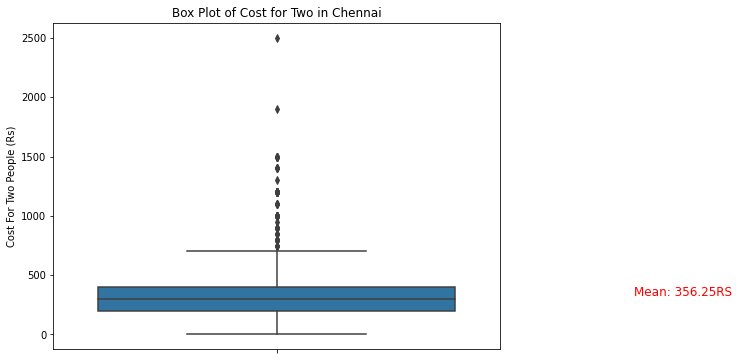

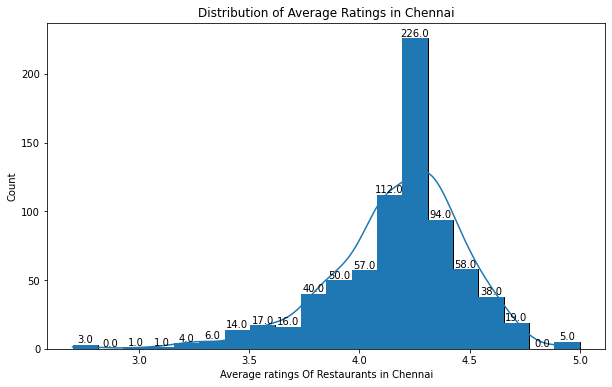

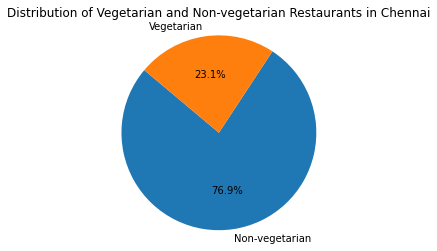

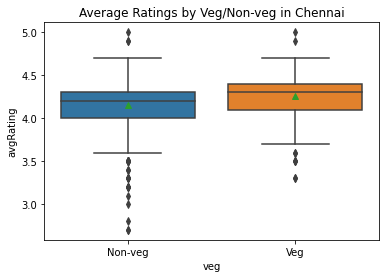

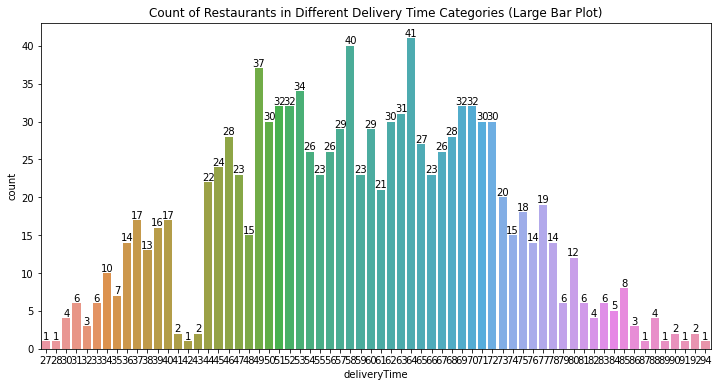

<Figure size 2592x864 with 0 Axes>

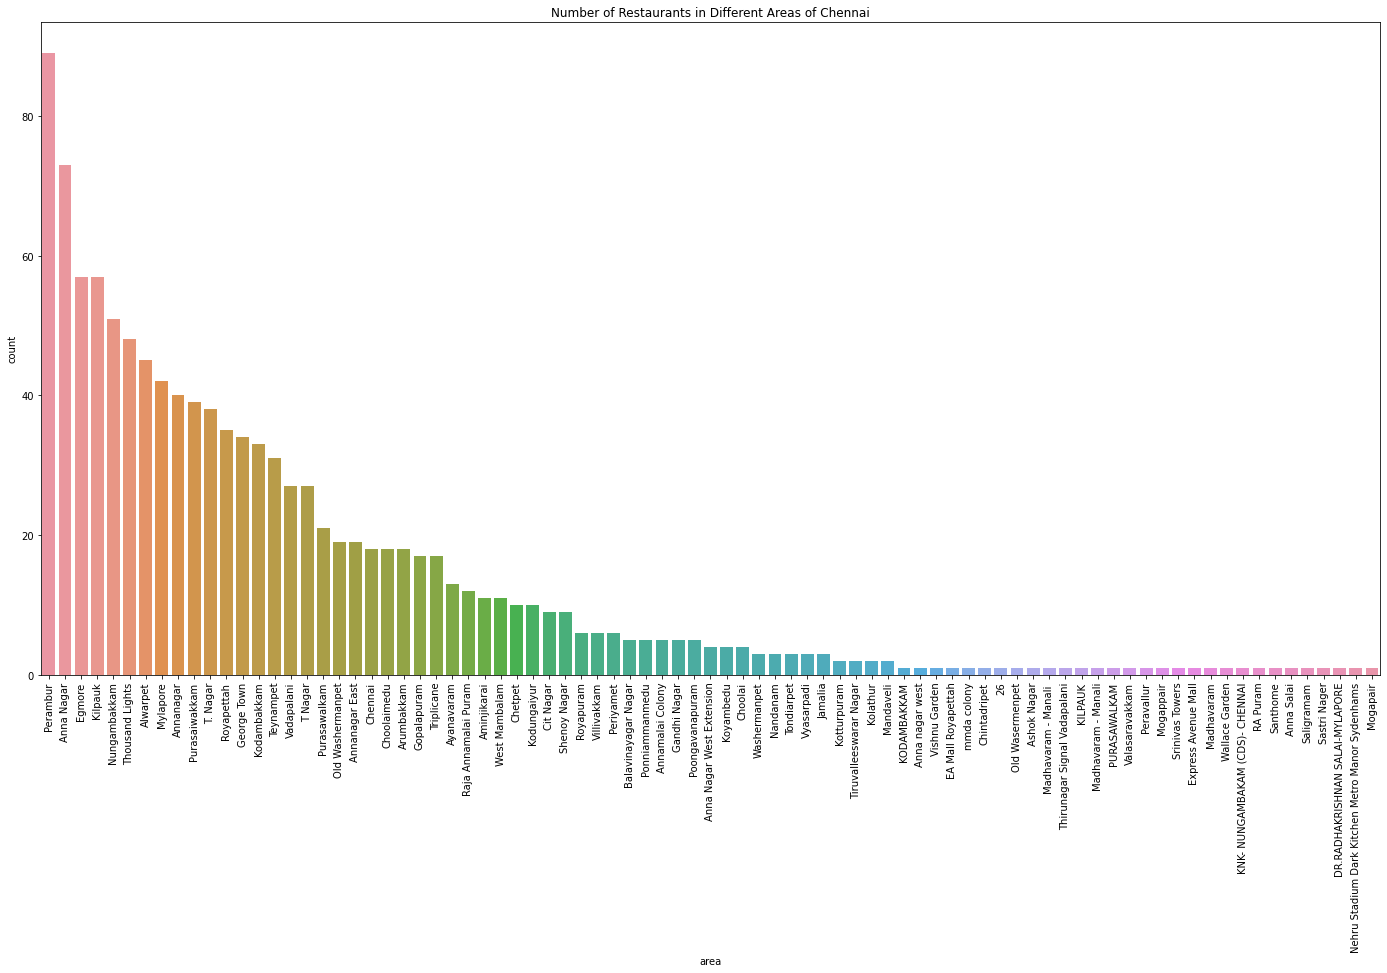

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


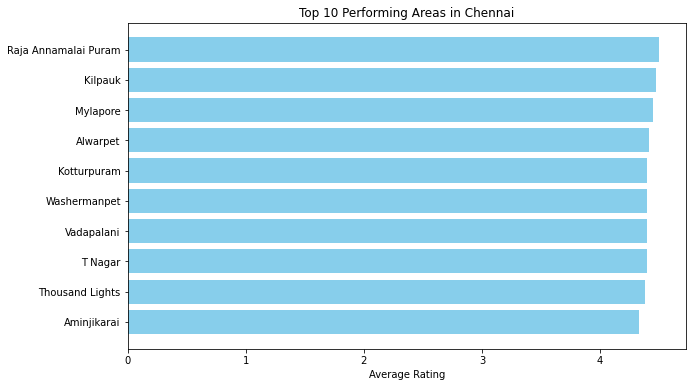

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


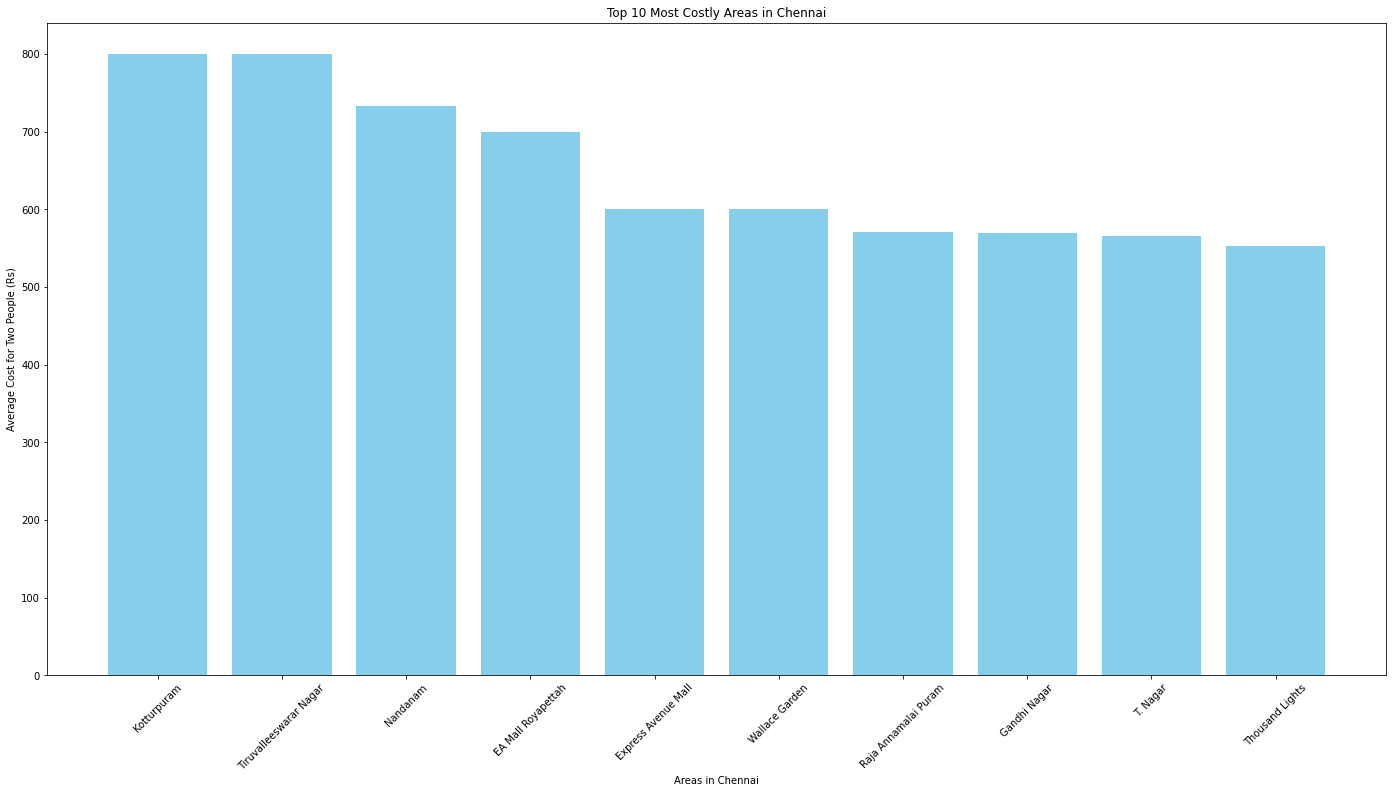

Delhi


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


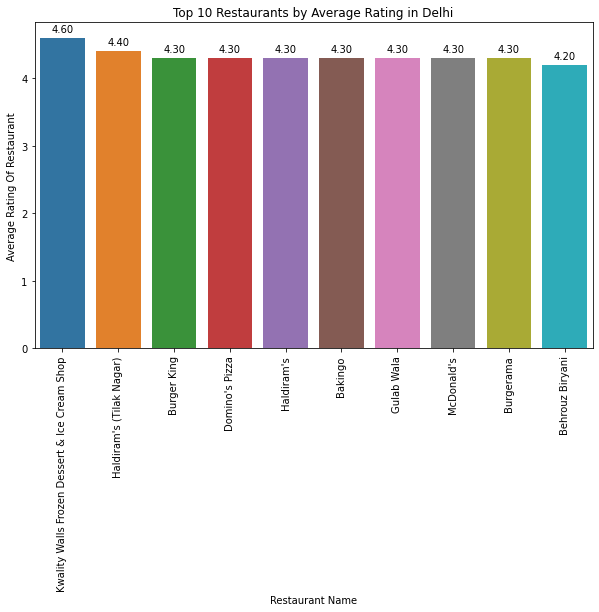

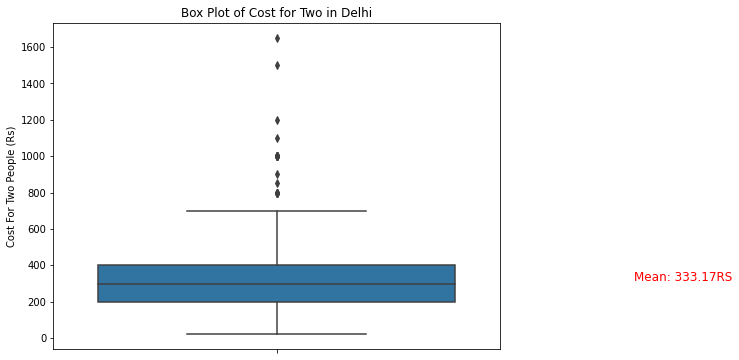

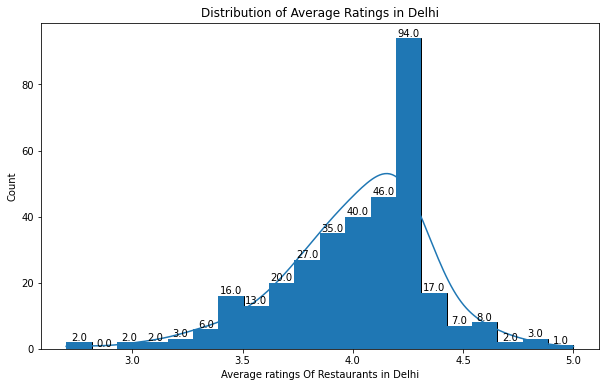

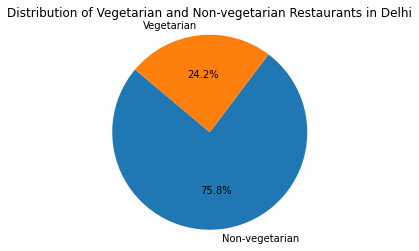

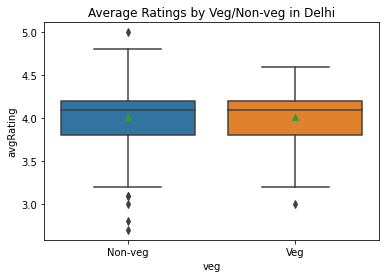

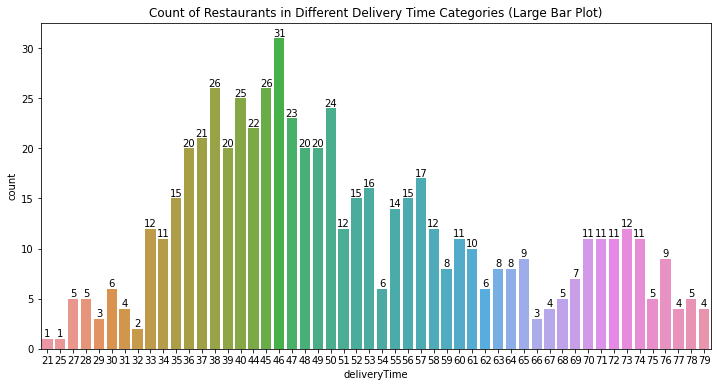

<Figure size 2592x864 with 0 Axes>

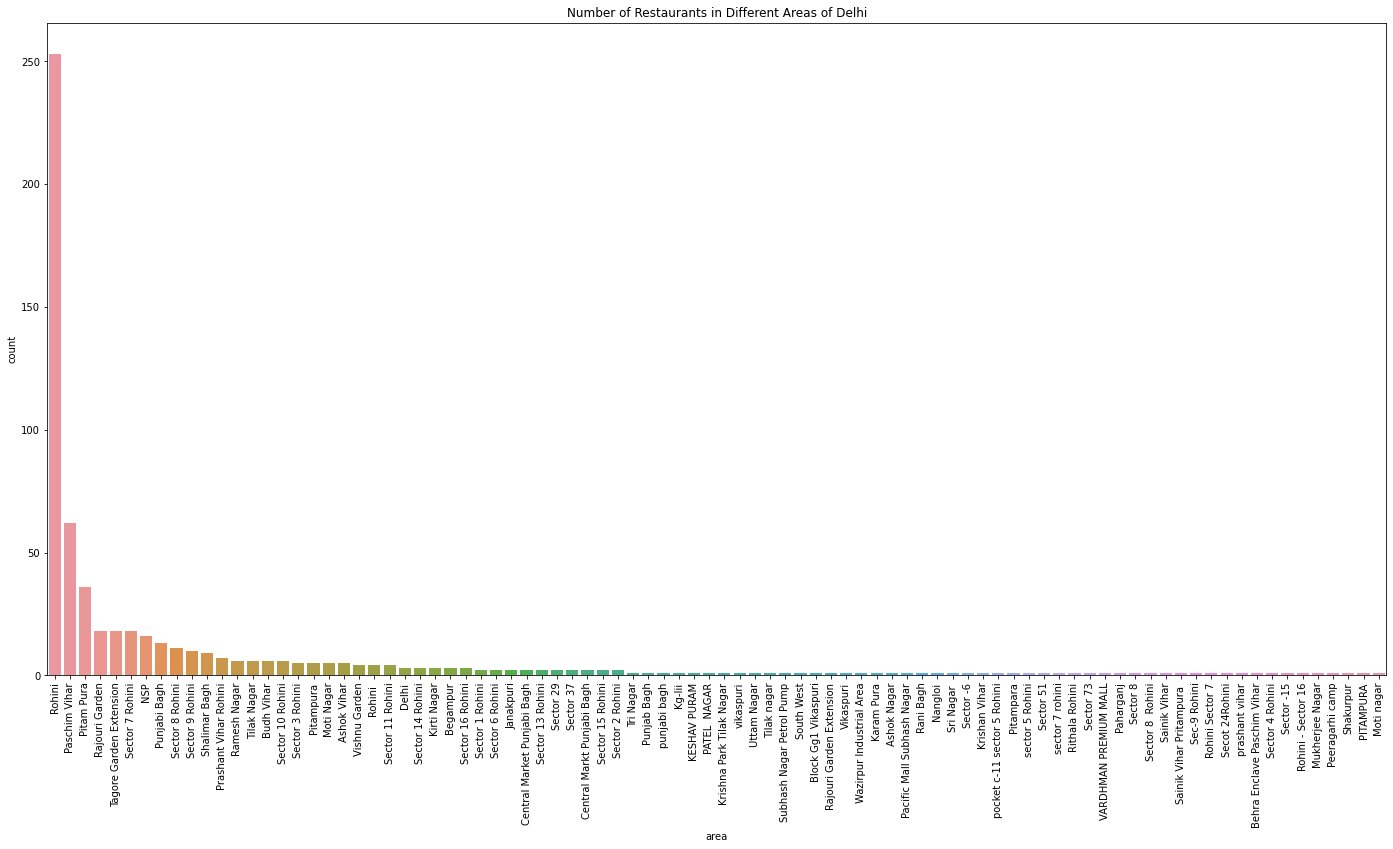

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


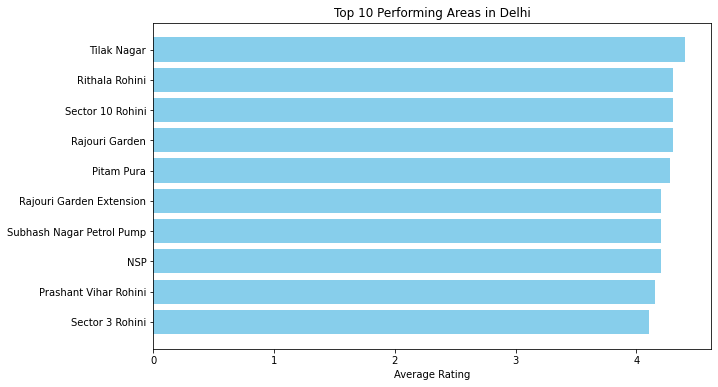

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


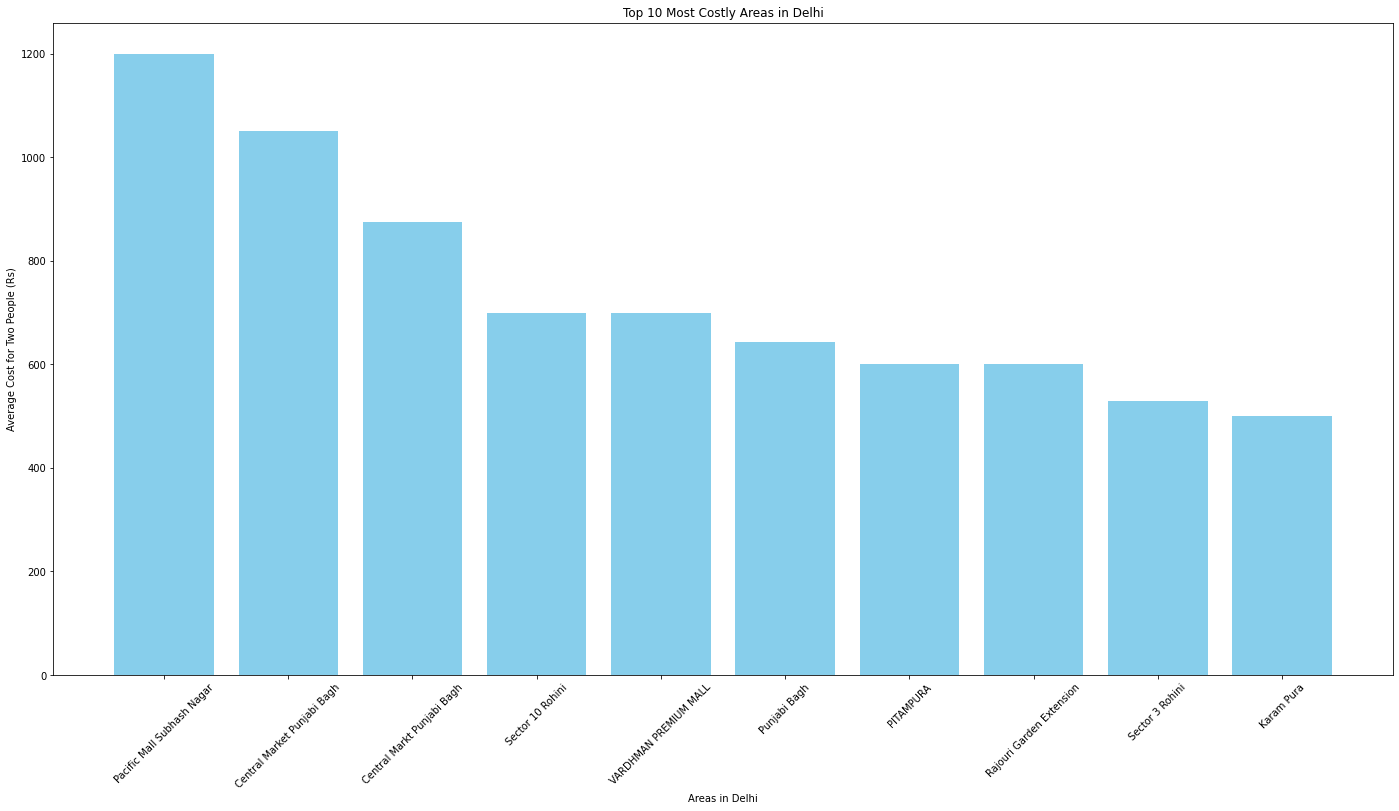

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')


Hyderabad


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


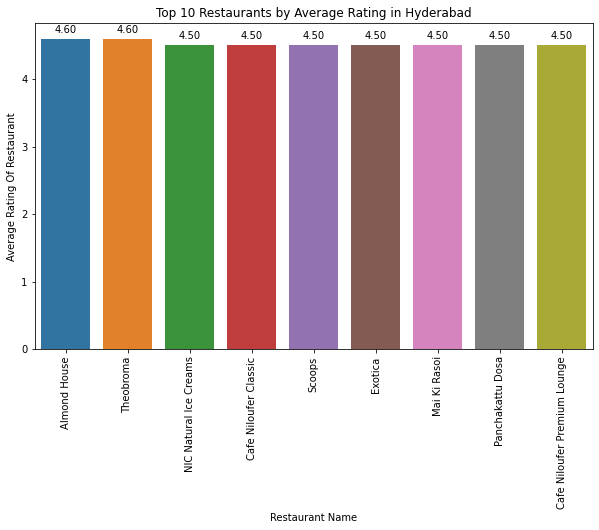

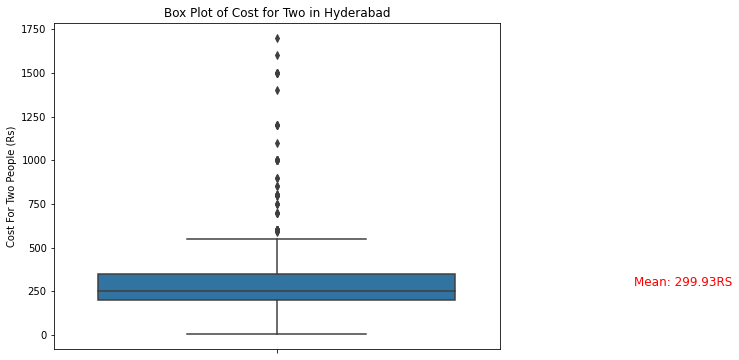

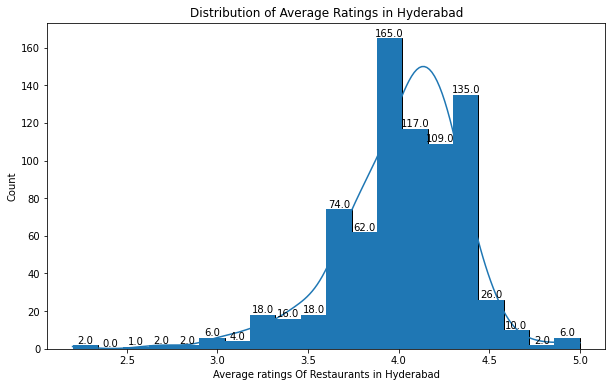

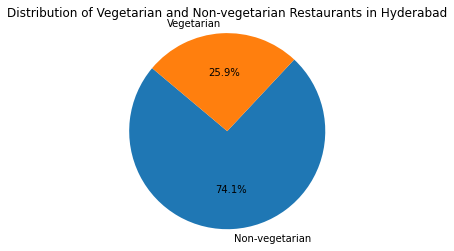

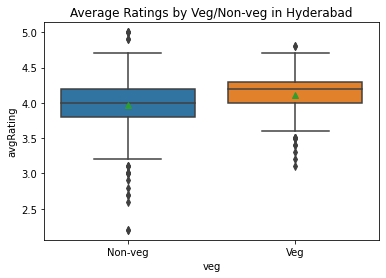

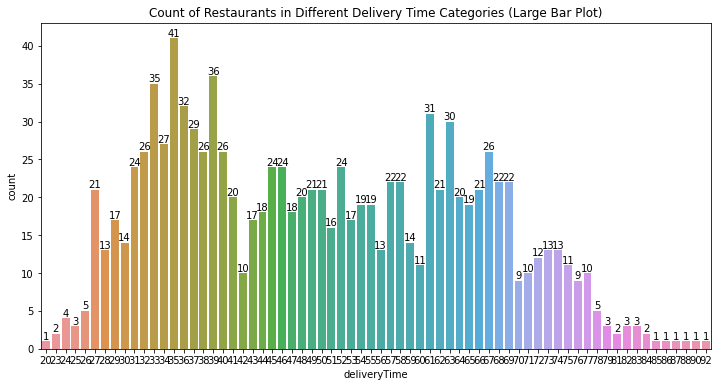

<Figure size 2592x864 with 0 Axes>

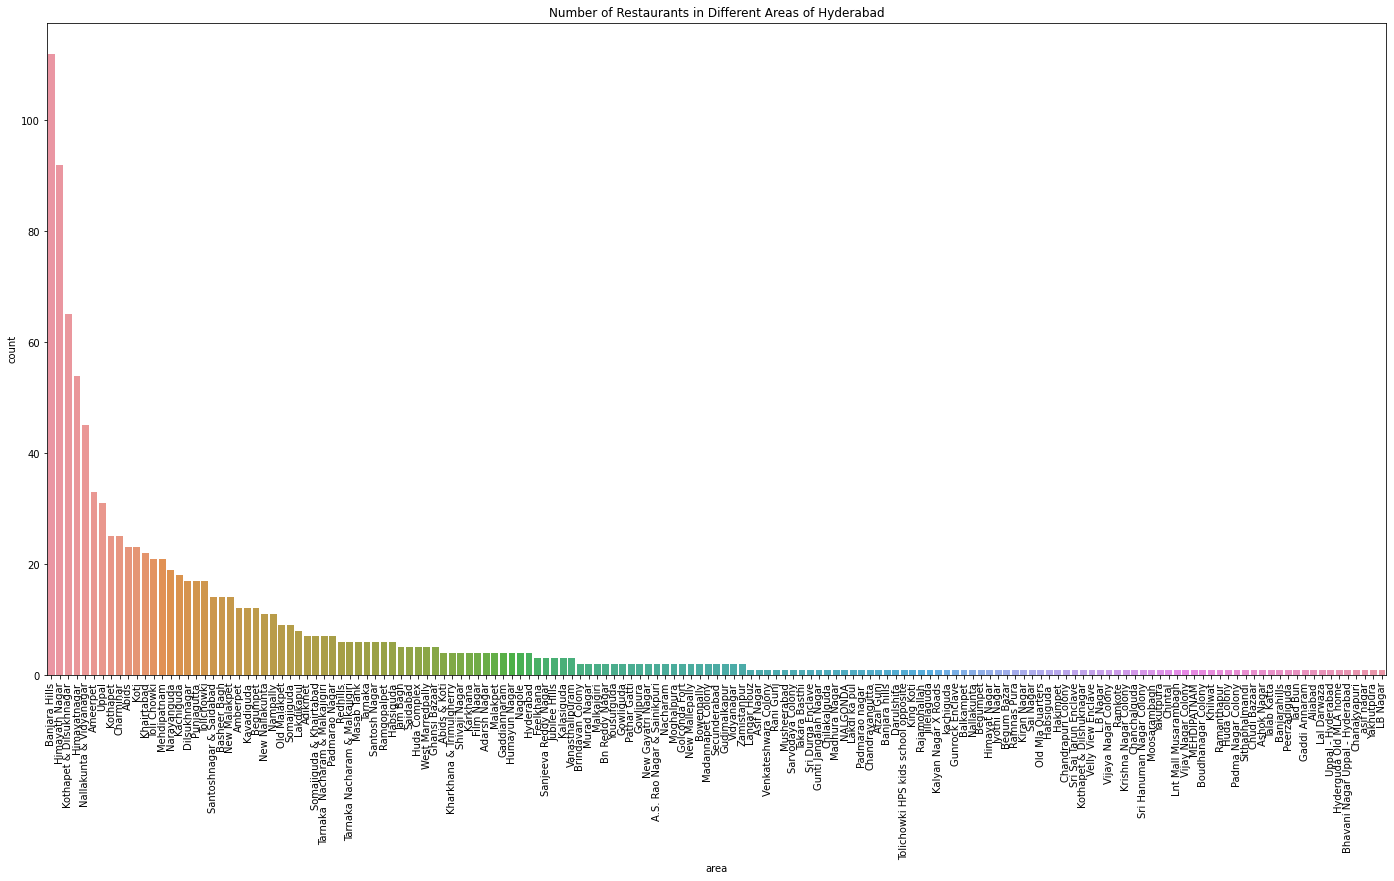

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


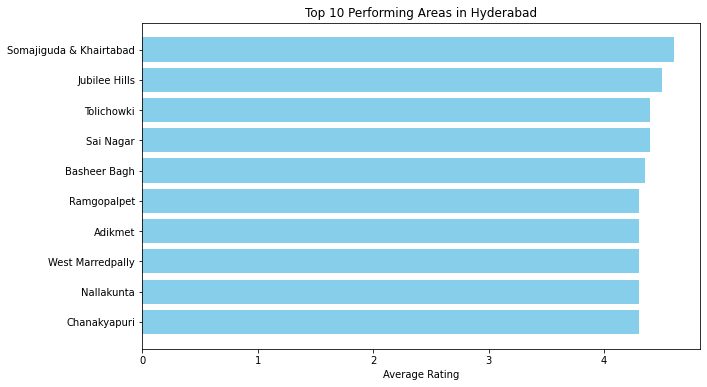

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


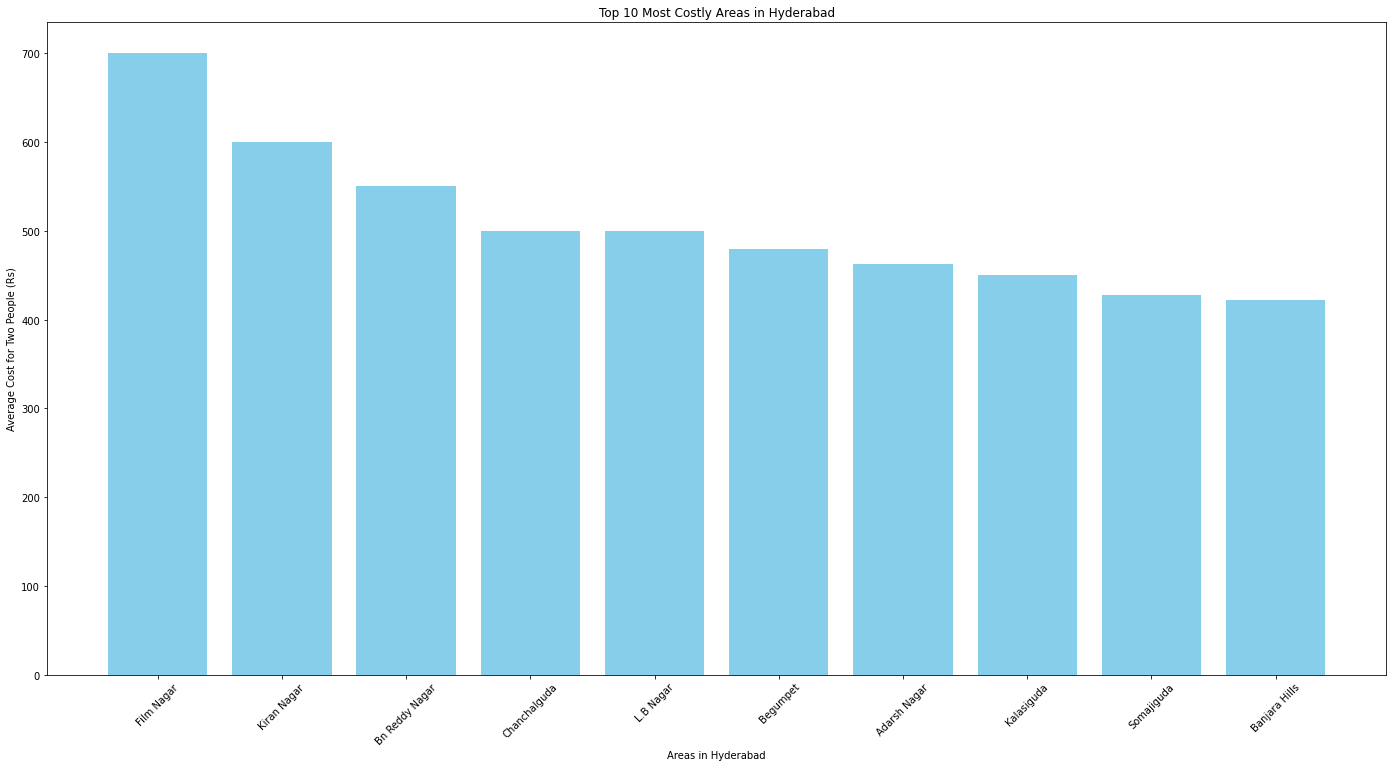

Kolkata


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


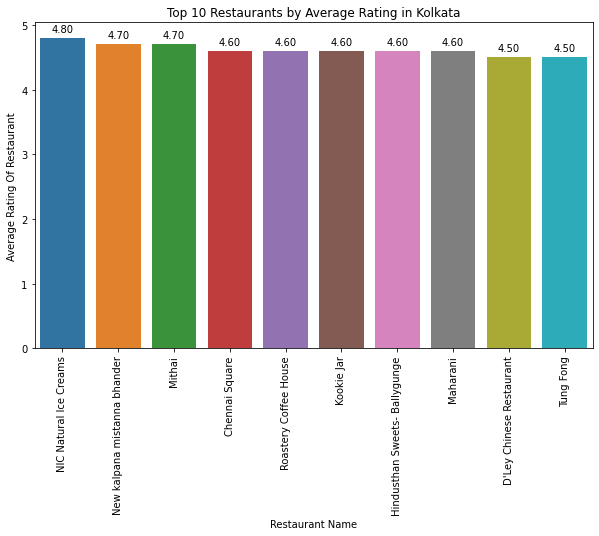

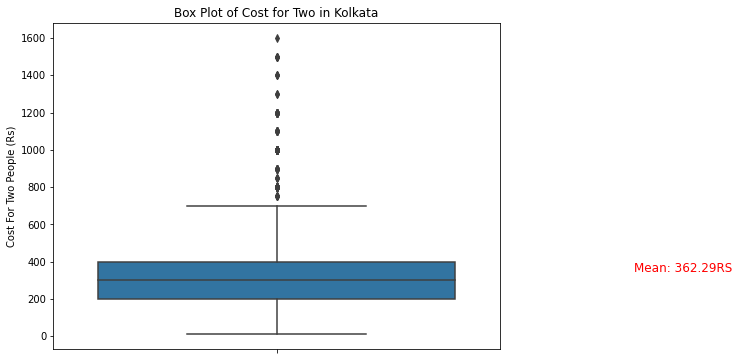

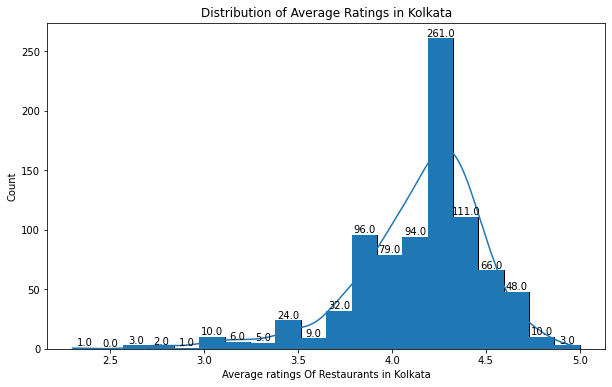

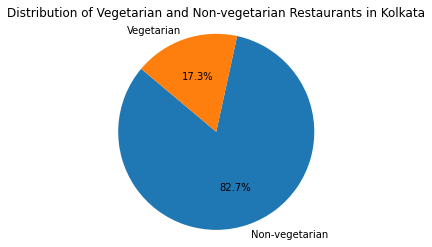

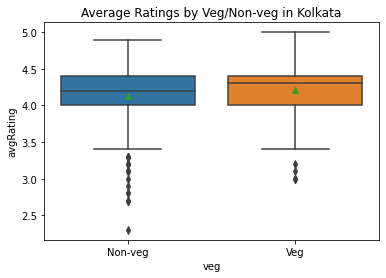

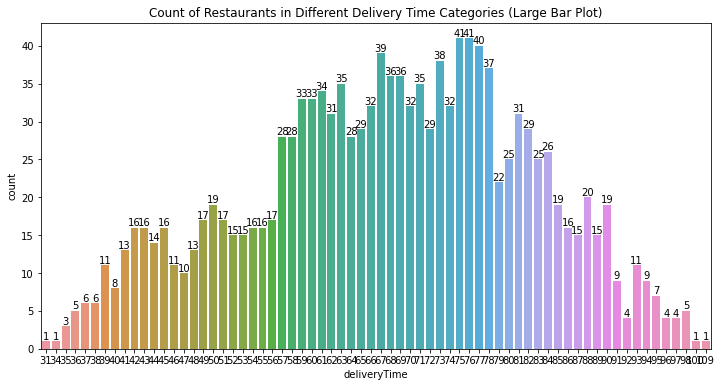

<Figure size 2592x864 with 0 Axes>

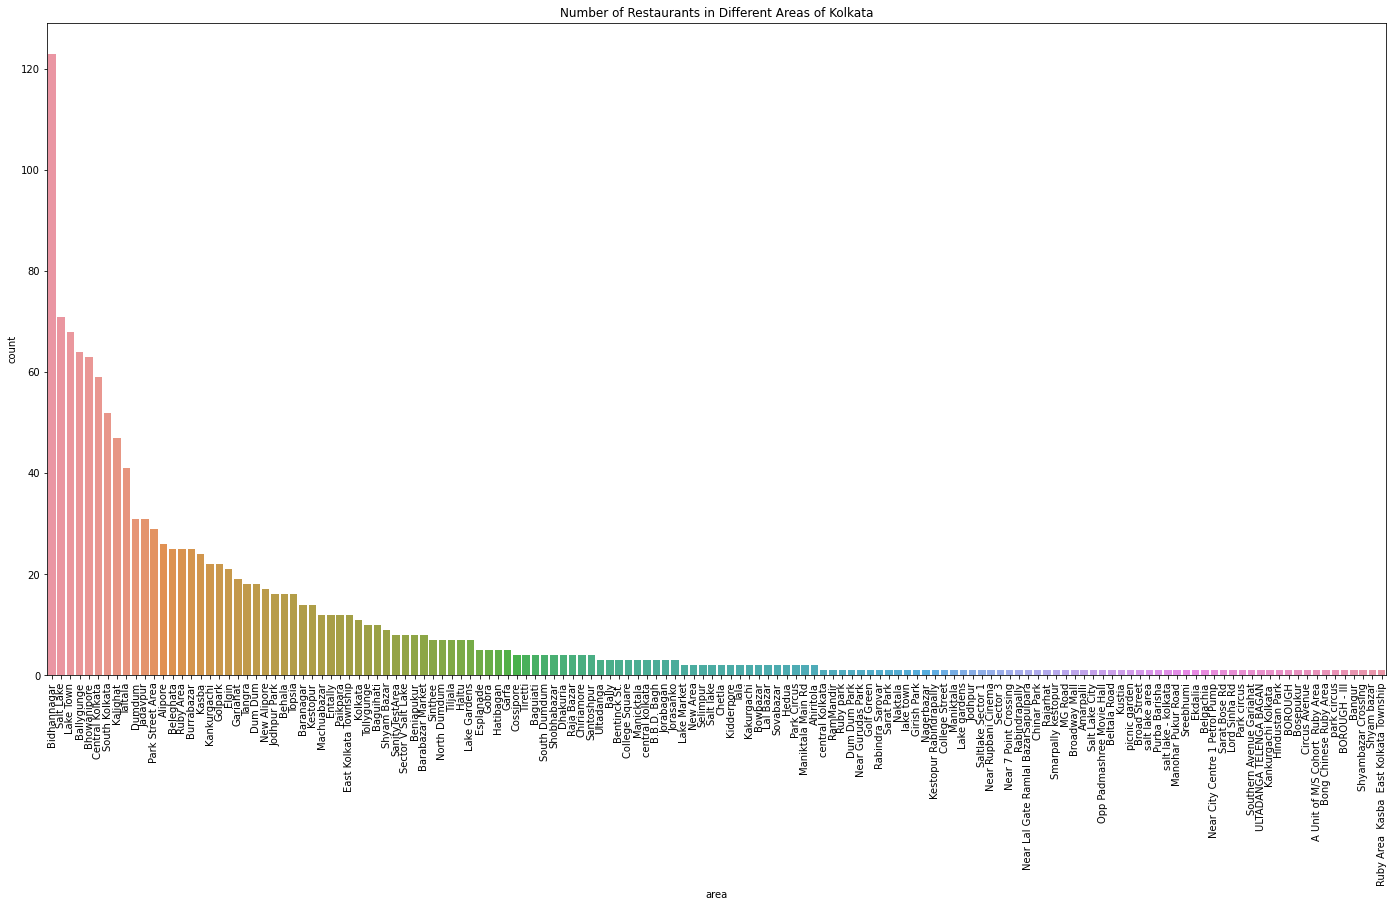

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


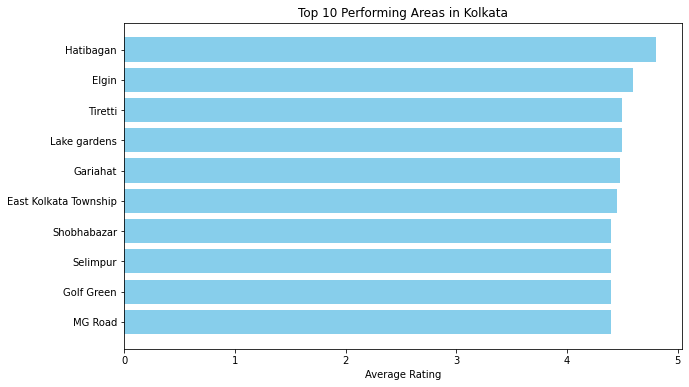

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


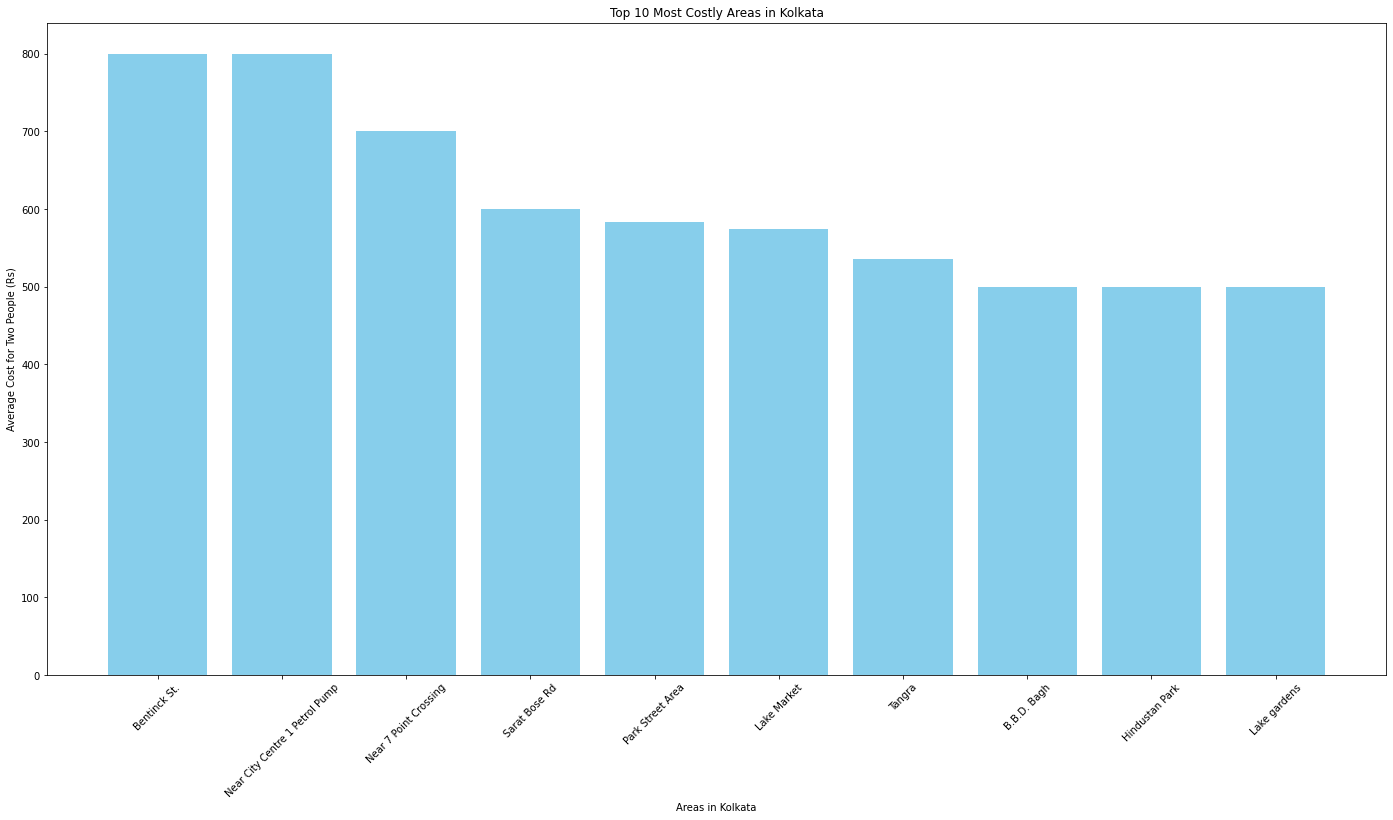

Mumbai


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


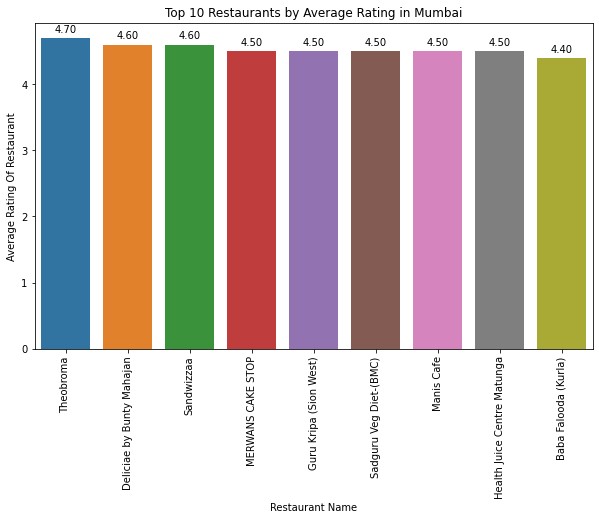

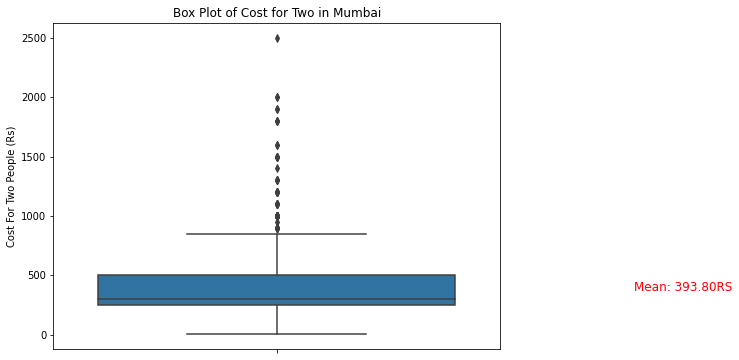

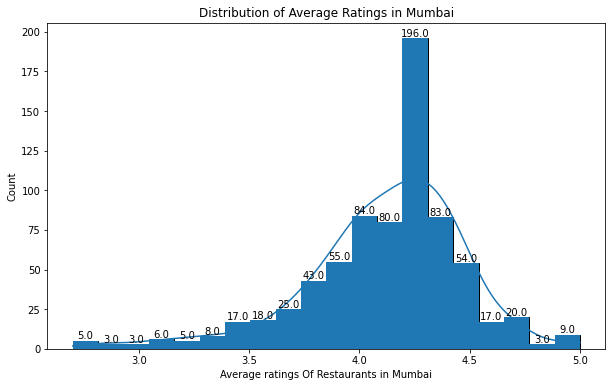

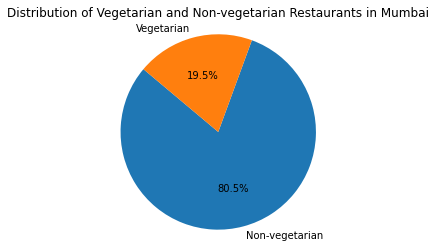

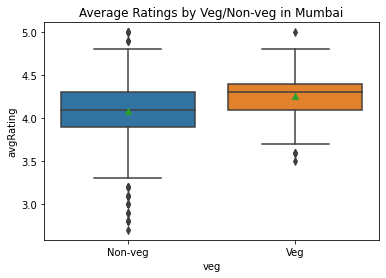

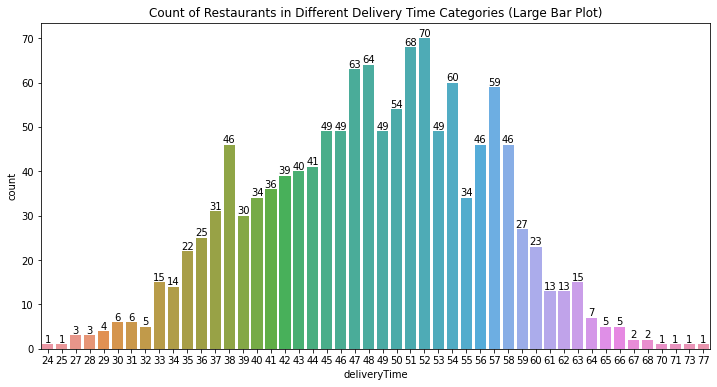

<Figure size 2592x864 with 0 Axes>

c:\Users\PRANAV JADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


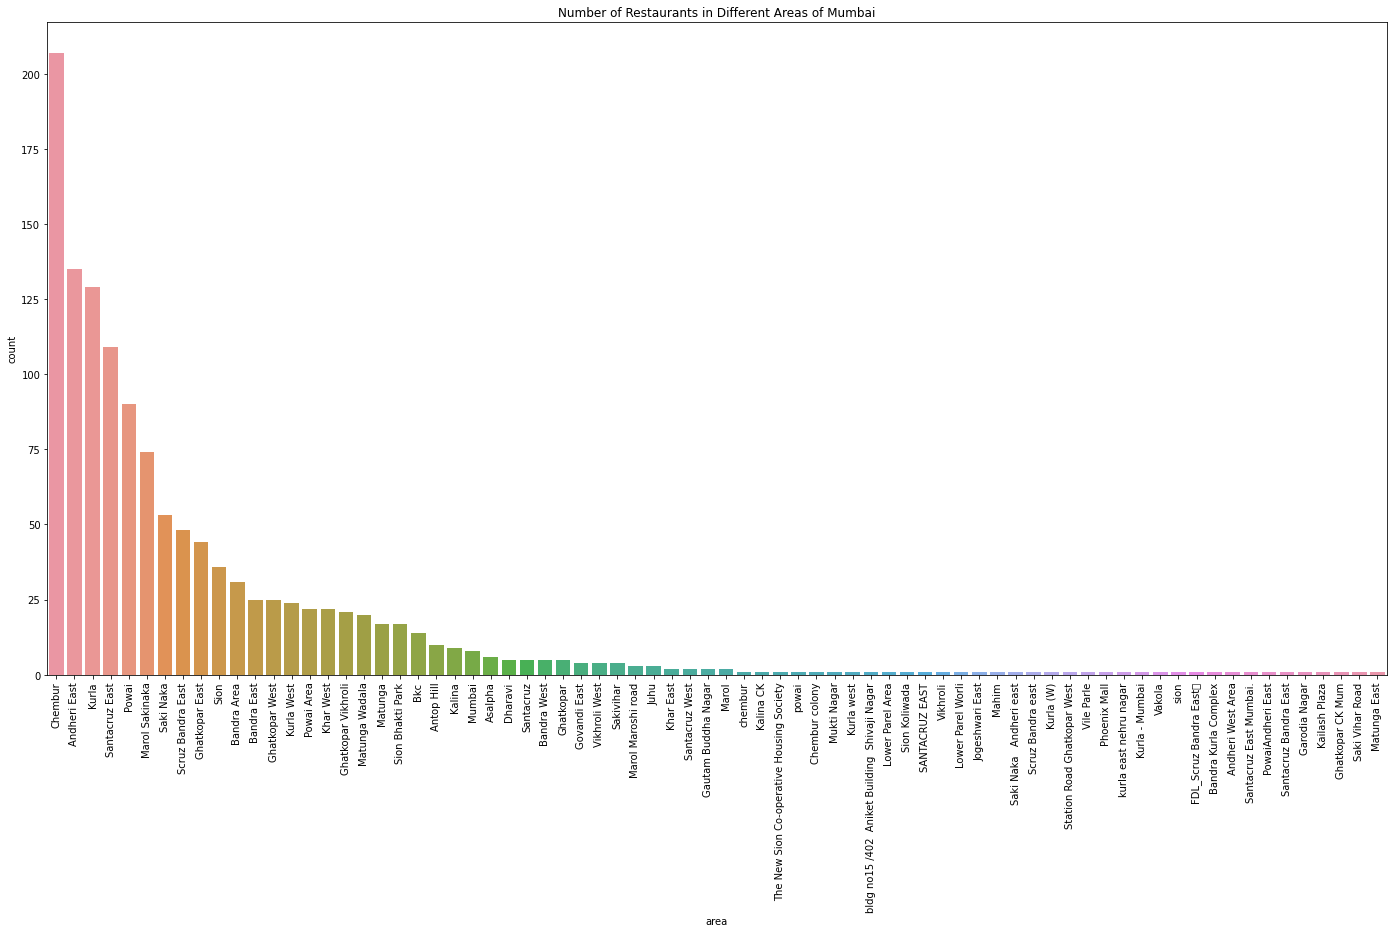

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


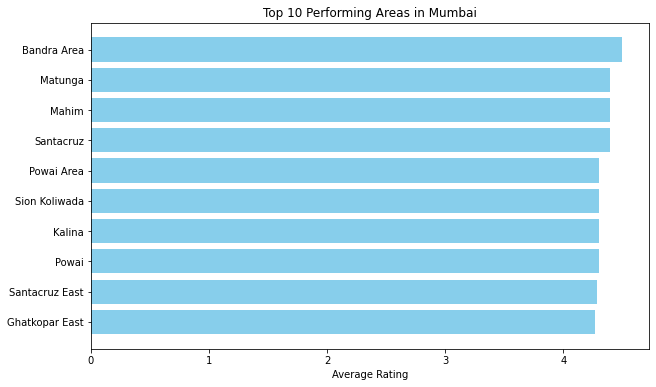

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


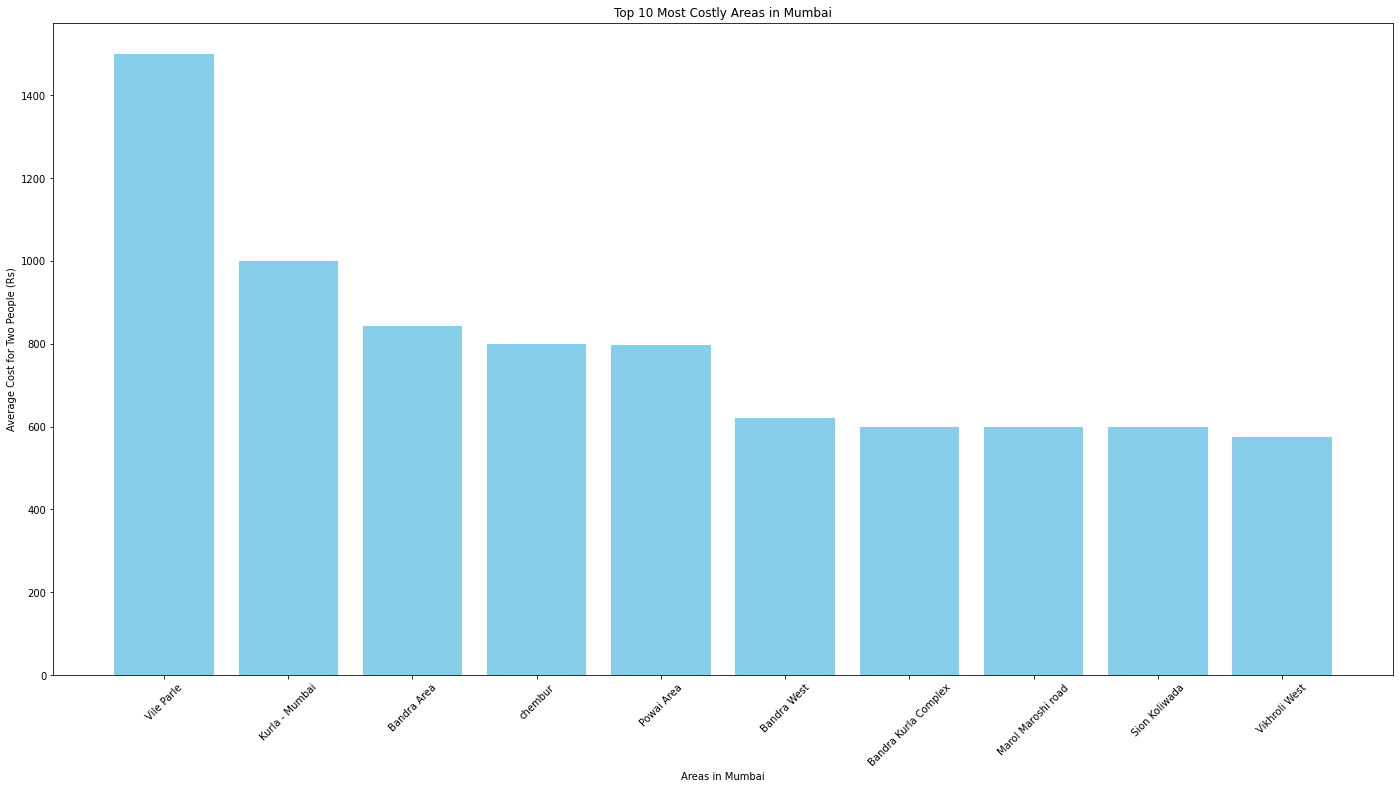

Pune


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


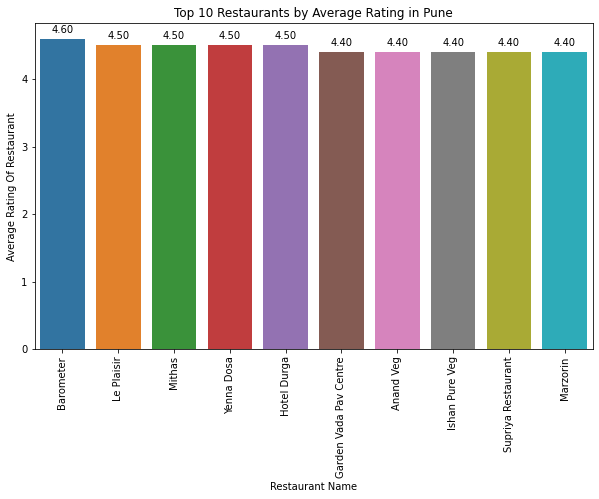

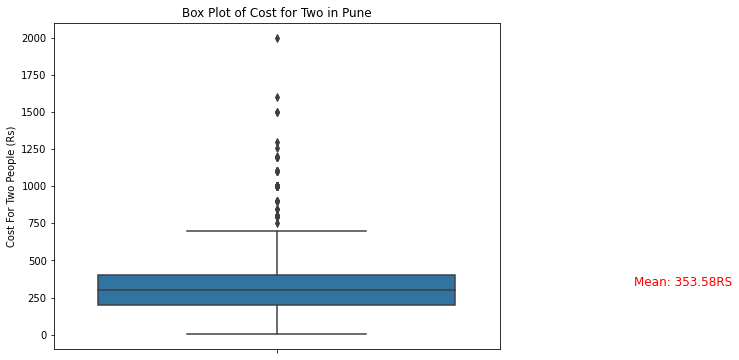

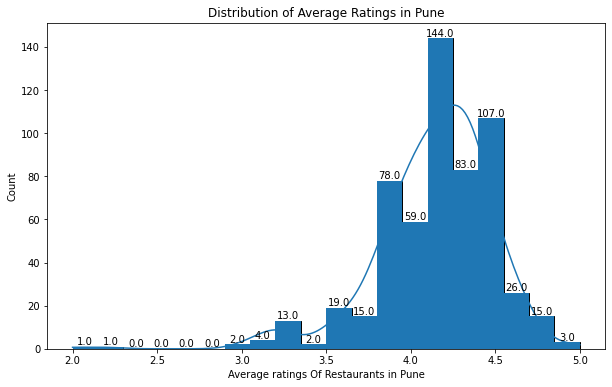

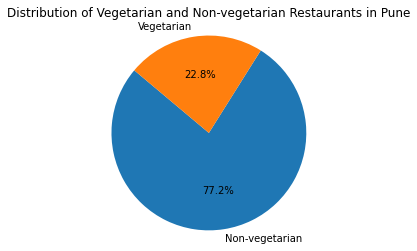

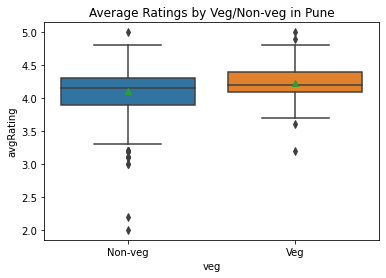

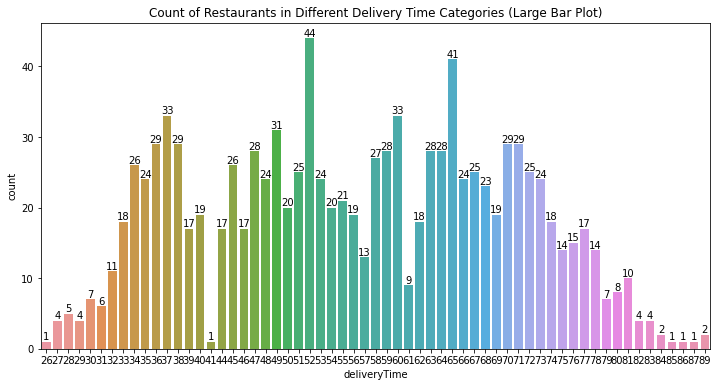

<Figure size 2592x864 with 0 Axes>

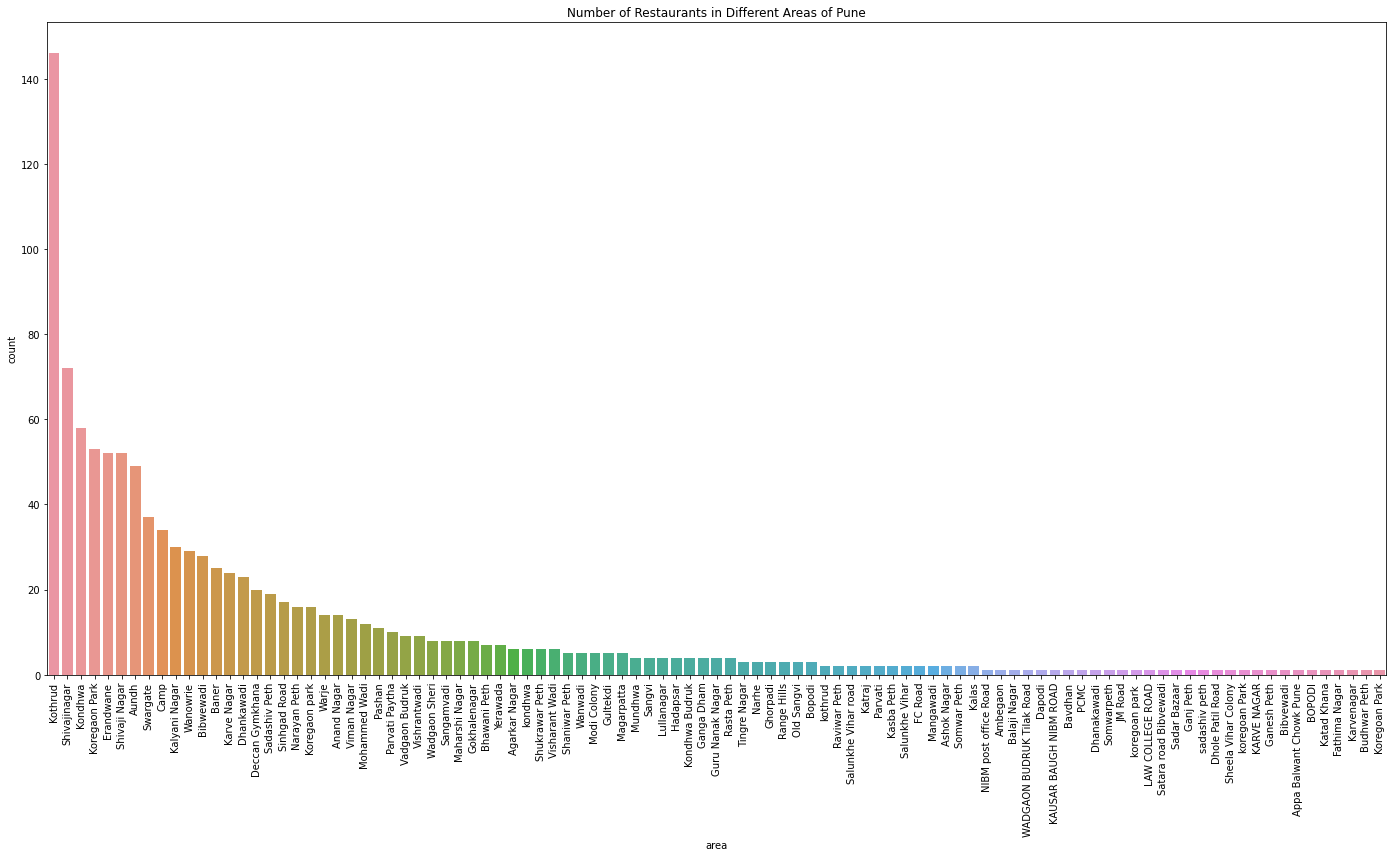

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


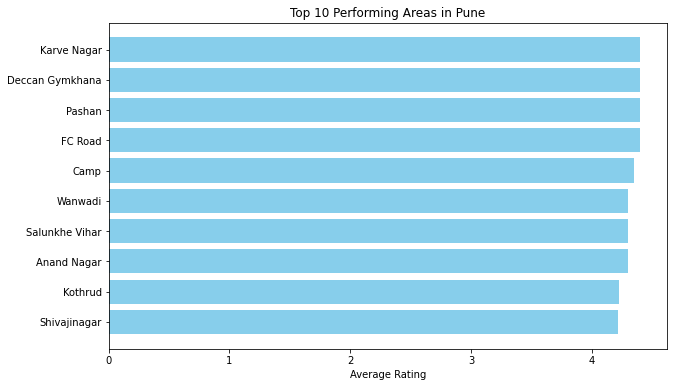

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


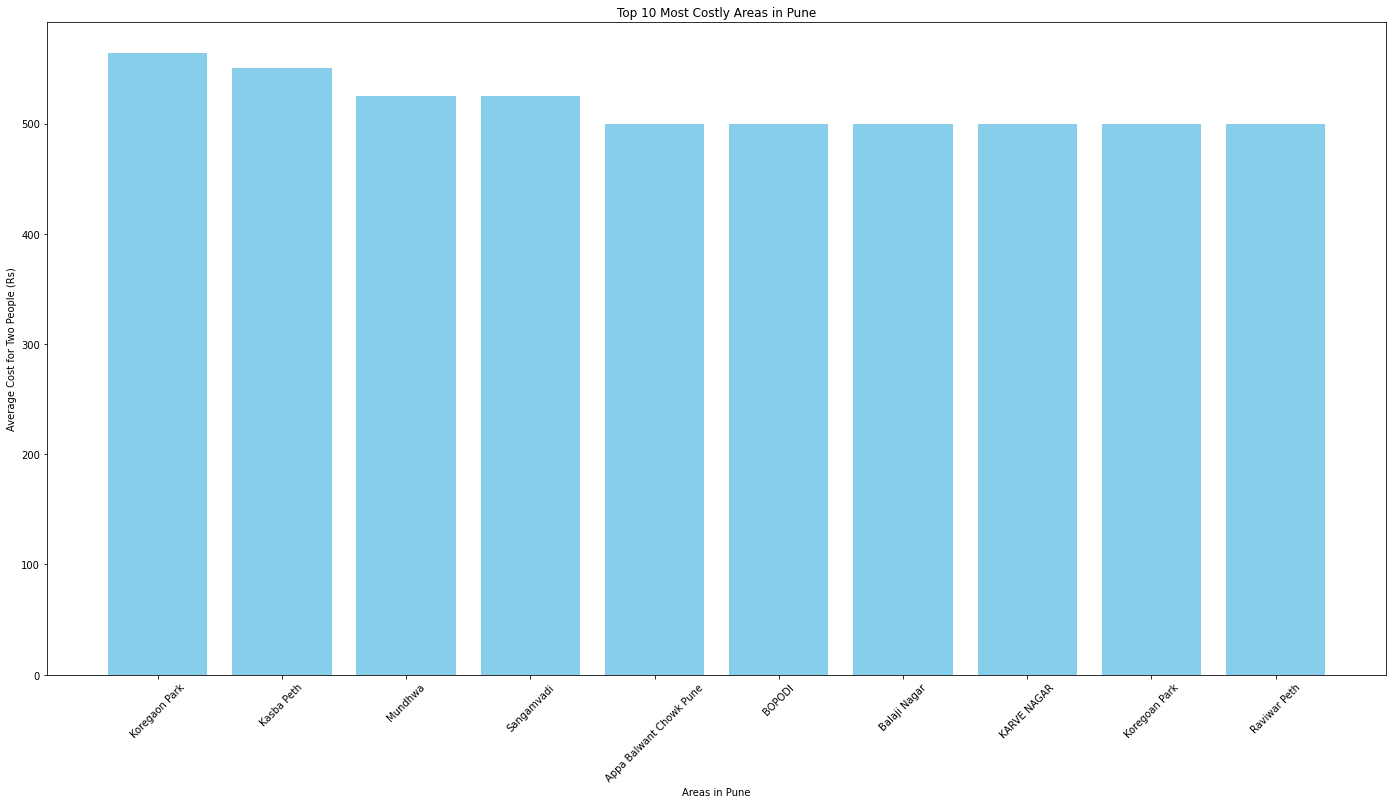

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatingsString'] = city_data['totalRatingsString'].fillna('0')


Surat


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\815981955.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['totalRatings'] = city_data['totalRatingsString'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)


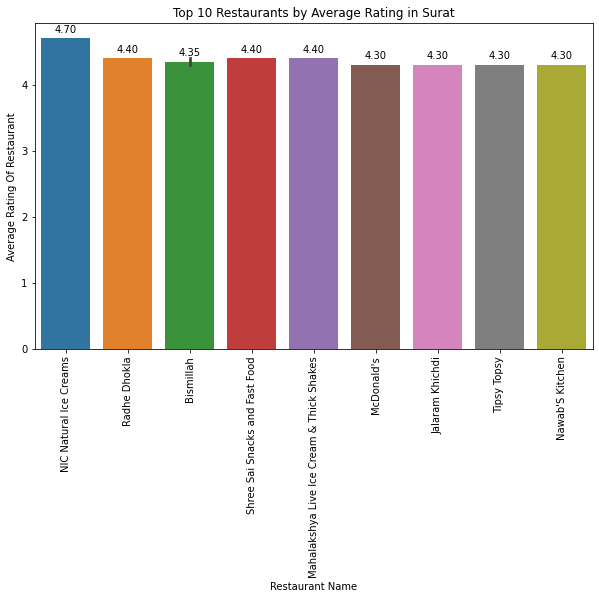

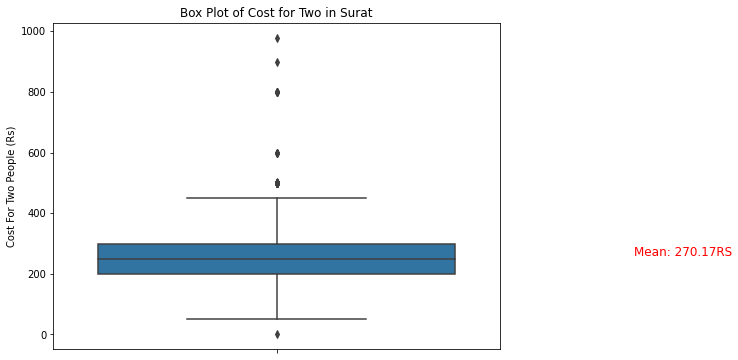

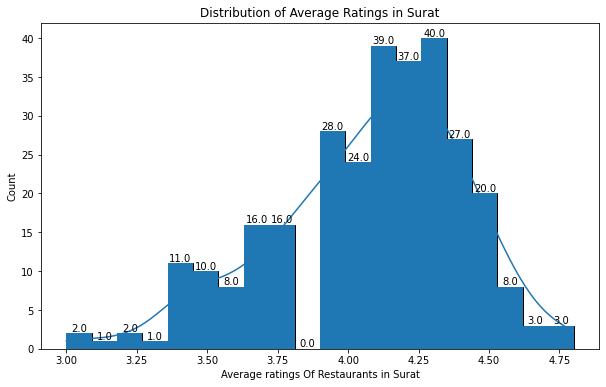

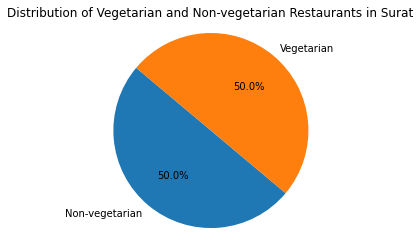

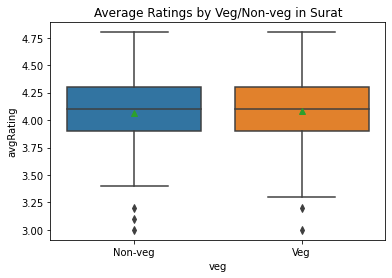

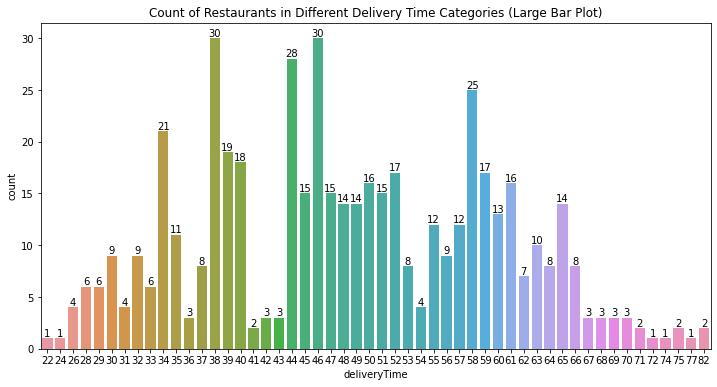

<Figure size 2592x864 with 0 Axes>

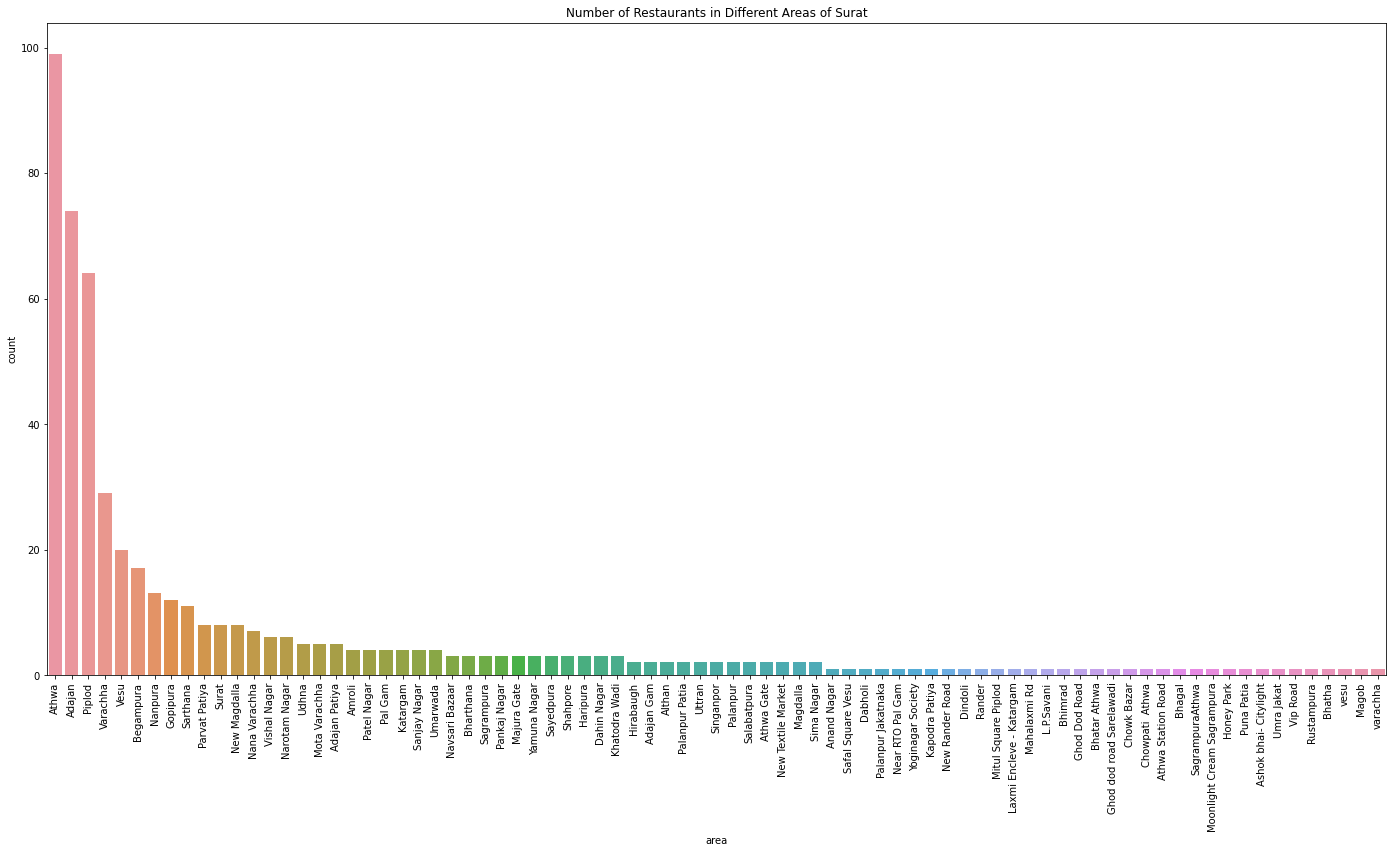

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\171637509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalRatings'] = data['totalRatingsString'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


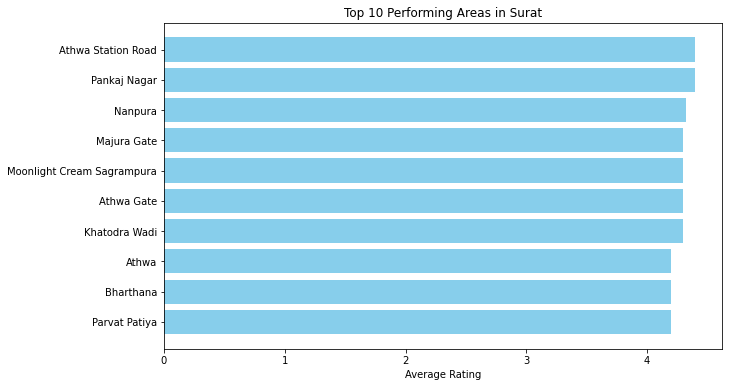

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3319368373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)


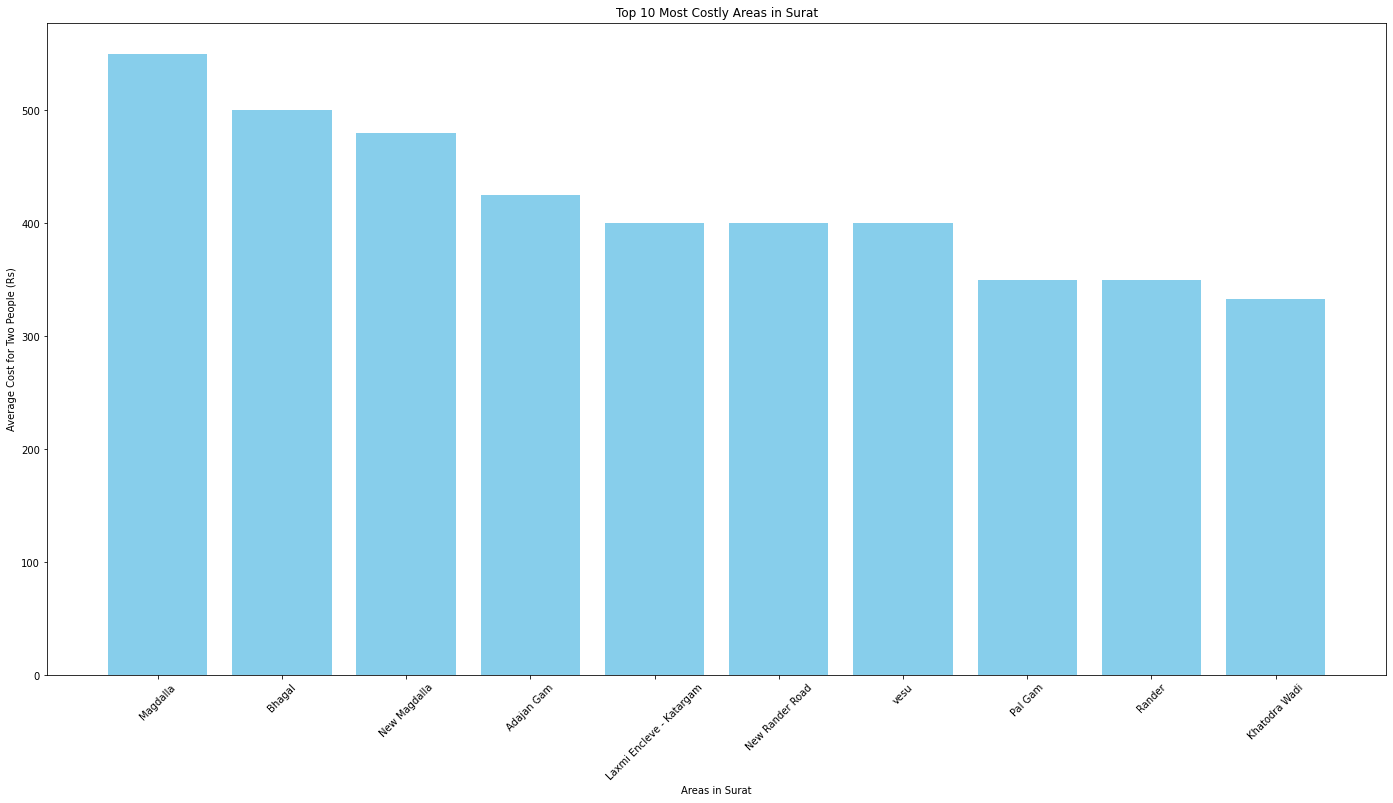

In [38]:
for city in unique_cities:
 bold = "\033[1m"
 reset = "\033[0m"
 print(bold + city + reset)
 Return_top_10_restaurants(city)
 Cost_for_Two(city)
#  Avg_rating_vs_CostForTwo(city)
 Distribution_of_AvgRatings(city)
 Veg_Nonveg_pieChart(city)
 AvgRating_By_veg_non_veg(city)
#  Avg_rating_vs_total_Ratings(city)
 Time_Distribution(city)
#  Correlation_of_numeric_columns(city)
 Area_wise_distribution(city)
 Top_Performing_areasInAcity(city)
#  CostForTwoReg(city)
 Most_costly_area(city)

In [39]:
# unique_cities = df['city'].unique()

# # Initialize empty lists to store the most costly and least costly areas for all cities
# most_costly_areas = []
# least_costly_areas = []

# # Loop through each city and find the most costly and least costly areas
# for city in unique_cities:
#     city_data = df[df['city'] == city]
#     city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
#     area_cost = city_data.groupby('area').apply(lambda x: (x['costForTwo'] * x['restaurantanme'].count()).sum() / x['restaurantanme'].count()).reset_index()
#     area_cost.columns = ['area', 'weighted_cost']
    
#     most_costly_area = area_cost.nlargest(1, 'weighted_cost')
#     least_costly_area = area_cost.nsmallest(1, 'weighted_cost')
    
#     most_costly_areas.append((city, most_costly_area))
#     least_costly_areas.append((city, least_costly_area))

# # Create bar plots for veg and nonveg restaurant ratios
# plt.figure(figsize=(14, 8))
# plot_count = 1  # Counter to help position the plots

# for city, area_data in most_costly_areas:
#     area_name = area_data['area'].values[0]
#     area_data = df[(df['city'] == city) & (df['area'] == area_name)]
#     total_restaurants = len(area_data)
#     veg_restaurants = len(area_data[area_data['veg'] == 1])
#     nonveg_restaurants = len(area_data[area_data['veg'] == 0])
    
#     # Calculate veg and nonveg ratios
#     veg_ratio = veg_restaurants / total_restaurants
#     nonveg_ratio = nonveg_restaurants / total_restaurants

#     # Create a bar plot for veg and nonveg ratios
#     plt.subplot(2, len(unique_cities), plot_count)
#     plt.bar(['Veg', 'Nonveg'], [veg_ratio, nonveg_ratio], color=['green', 'red'])
#     plt.title(f'{city}, {area_name} - Most Costly Area')
#     plot_count += 1
# plt.tight_layout()
# plt.show()

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\1777147088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.extract(r'(\d+)').astype(float)
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\1777147088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.extract(r'(\d+)').astype(float)
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\1777147088.py:9: SettingWi

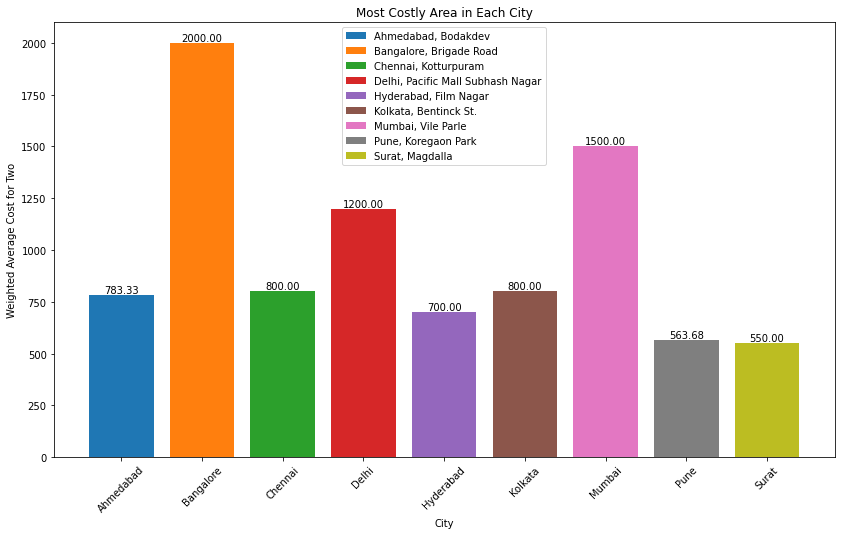

In [40]:
unique_cities = df['city'].unique()

# Initialize an empty list to store the most costly areas for all cities
most_costly_areas = []

# Loop through each city and find the most costly area
for city in unique_cities:
    city_data = df[df['city'] == city]
    city_data['costForTwo'] = city_data['costForTwoStrings'].str.extract(r'(\d+)').astype(float)
    
    # Calculate the weighted average cost for each area
    area_cost = city_data.groupby('area')['costForTwo'].mean().reset_index()
    area_cost.columns = ['area', 'weighted_cost']
    
    # Find the area with the highest weighted average cost
    most_costly_area = area_cost.nlargest(1, 'weighted_cost')
    
    # Store the city and most costly area details
    most_costly_areas.append((city, most_costly_area))

# Create a bar plot for the most costly areas in each city
plt.figure(figsize=(14, 8))

for city, area_data in most_costly_areas:
    area_name = area_data['area'].values[0]
    weighted_cost = area_data['weighted_cost'].values[0]
    
    # Plot the weighted average cost for each city's most costly area
    plt.bar(city, weighted_cost, label=f'{city}, {area_name}')
    
    # Set the cost as the Y-axis label
    plt.text(city, weighted_cost, f'{weighted_cost:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Weighted Average Cost for Two')
plt.title('Most Costly Area in Each City')
plt.legend()
plt.show()

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3479949937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\3479949937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
C:\Users\PRANAV JADHAV\AppData\Local\Tem

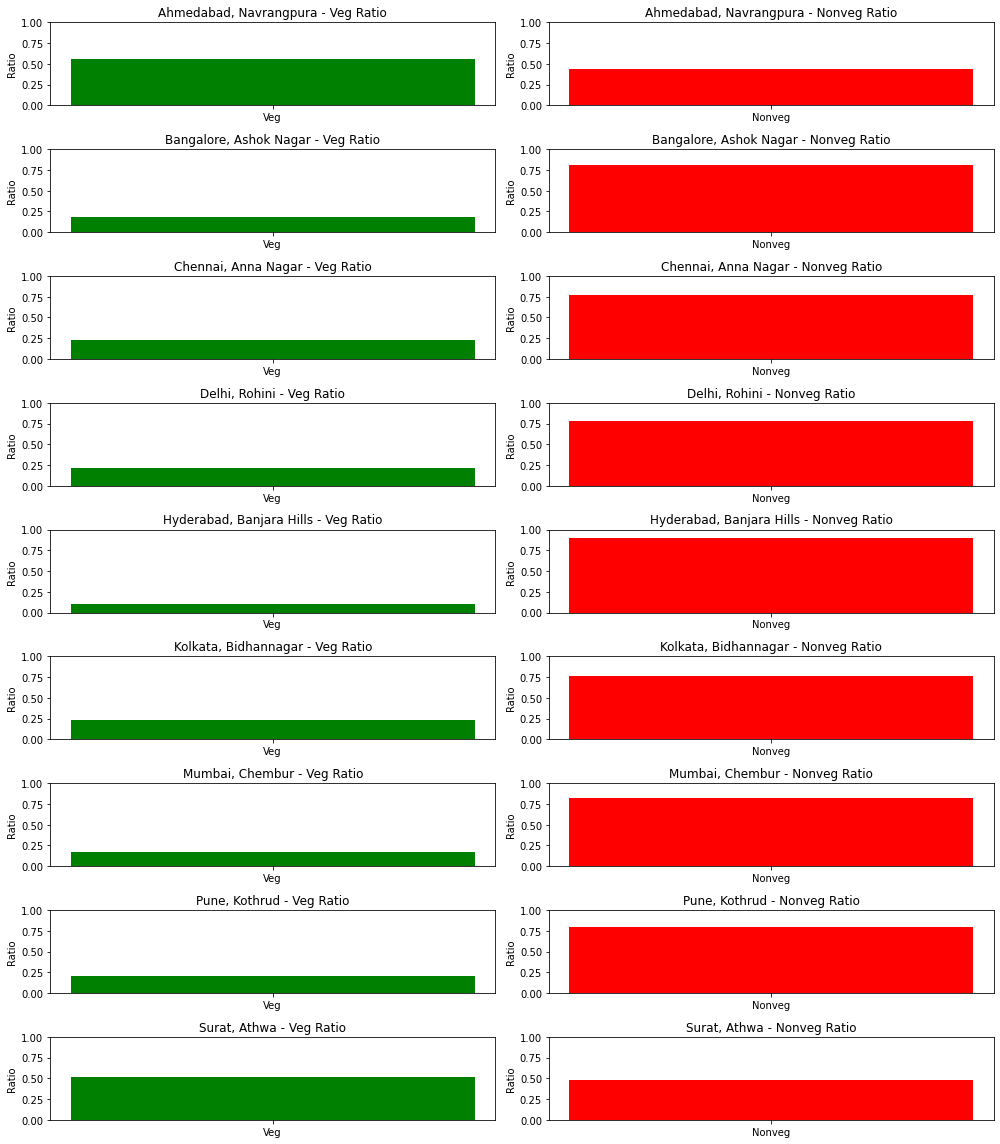

In [41]:
unique_cities = df['city'].unique()

# Initialize empty lists to store the most costly and least costly areas for all cities
most_costly_areas = []
least_costly_areas = []

# Loop through each city and find the most costly and least costly areas
for city in unique_cities:
    city_data = df[df['city'] == city]
    city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
    area_cost = city_data.groupby('area').apply(lambda x: (x['costForTwo'] * x['name'].count()).sum() / x['name'].count()).reset_index()
    area_cost.columns = ['area', 'weighted_cost']
    
    most_costly_area = area_cost.nlargest(1, 'weighted_cost')
    least_costly_area = area_cost.nsmallest(1, 'weighted_cost')
    
    most_costly_areas.append((city, most_costly_area))
    least_costly_areas.append((city, least_costly_area))

# Create bar plots for veg and nonveg restaurant ratios
plt.figure(figsize=(14, 16))  # Adjust the figure size

for idx, (city, area_data) in enumerate(most_costly_areas):
    area_name = area_data['area'].values[0]
    area_data = df[(df['city'] == city) & (df['area'] == area_name)]
    total_restaurants = len(area_data)
    veg_restaurants = len(area_data[area_data['veg'] == 1])
    nonveg_restaurants = len(area_data[area_data['veg'] == 0])
    
    # Calculate veg and nonveg ratios
    veg_ratio = veg_restaurants / total_restaurants
    nonveg_ratio = nonveg_restaurants / total_restaurants

    # Create a bar plot for veg ratio with bar label
    plt.subplot(len(unique_cities), 2, idx * 2 + 1)
    plt.bar(['Veg'], [veg_ratio], color=['green'])
    plt.title(f'{city}, {area_name} - Veg Ratio')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)

    # Create a bar plot for nonveg ratio with bar label
    plt.subplot(len(unique_cities), 2, idx * 2 + 2)
    plt.bar(['Nonveg'], [nonveg_ratio], color=['red'])
    plt.title(f'{city}, {area_name} - Nonveg Ratio')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\639076083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\639076083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ip

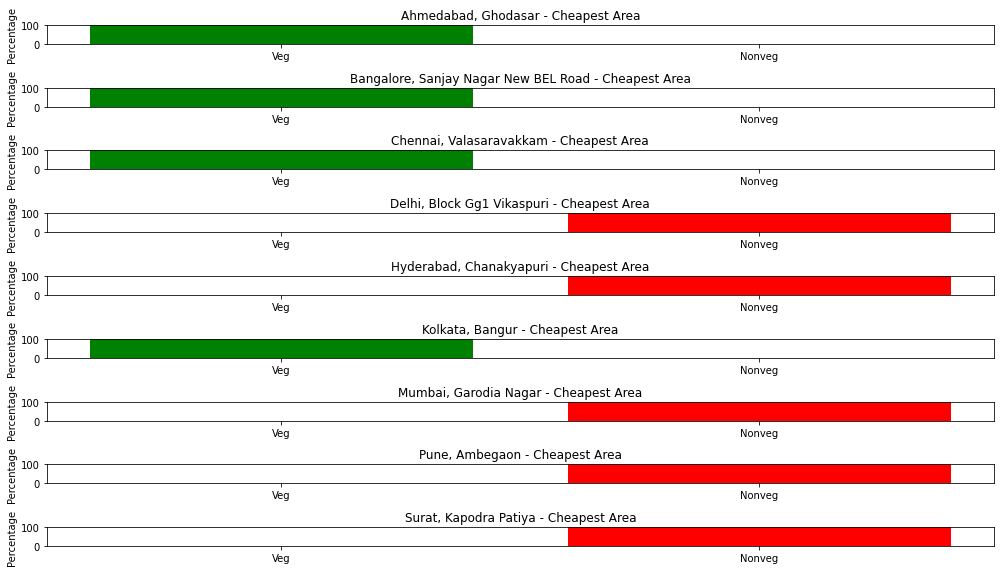

In [42]:
unique_cities = df['city'].unique()

# Initialize empty lists to store the cheapest areas for all cities
cheapest_areas = []

# Loop through each city and find the cheapest areas
for city in unique_cities:
    city_data = df[df['city'] == city]
    city_data['costForTwo'] = city_data['costForTwoStrings'].str.replace('₹', '').str.extract(r'(\d+)').astype(float)
    area_cost = city_data.groupby('area').apply(lambda x: (x['costForTwo'] * x['name'].count()).sum() / x['name'].count()).reset_index()
    area_cost.columns = ['area', 'weighted_cost']
    
    cheapest_area = area_cost.nsmallest(1, 'weighted_cost')
    cheapest_areas.append((city, cheapest_area))

# Create bar plots for veg and nonveg restaurant percentages in the cheapest area
plt.figure(figsize=(14, 8))

for idx, (city, area_data) in enumerate(cheapest_areas):
    area_name = area_data['area'].values[0]
    area_data = df[(df['city'] == city) & (df['area'] == area_name)]
    total_restaurants = len(area_data)
    veg_restaurants = len(area_data[area_data['veg'] == 1])
    nonveg_restaurants = len(area_data[area_data['veg'] == 0])
    
    # Calculate veg and nonveg percentages
    veg_percentage = (veg_restaurants / total_restaurants) * 100
    nonveg_percentage = (nonveg_restaurants / total_restaurants) * 100

    # Create a bar plot for veg and nonveg percentages in the cheapest area
    plt.subplot(len(unique_cities), 1, idx + 1)
    plt.bar(['Veg', 'Nonveg'], [veg_percentage, nonveg_percentage], color=['green', 'red'])
    plt.title(f'{city}, {area_name} - Cheapest Area')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [43]:
unique_cities = df['city'].unique()

# Loop through each city and calculate the Veg to Nonveg ratio in the cheapest area
for city_name in unique_cities:
    # Filter the data for the current city
    city_data = df[df['city'] == city_name]
    
    # Identify the cheapest area in the city based on your criteria
    cheapest_area = city_data.groupby('area')['costForTwo'].mean().idxmin()
    
    # Filter data for the cheapest area in the city
    cheapest_area_data = city_data[city_data['area'] == cheapest_area]
    
    # Calculate the number of Veg and Nonveg restaurants in the cheapest area
    total_restaurants = len(cheapest_area_data)
    veg_restaurants = len(cheapest_area_data[cheapest_area_data['veg'] == 1])
    nonveg_restaurants = len(cheapest_area_data[cheapest_area_data['veg'] == 0])
    
    # Calculate the ratio of Veg to Nonveg restaurants, handling division by zero
    veg_to_nonveg_ratio = veg_restaurants / nonveg_restaurants if nonveg_restaurants > 0 else 0
    
    # Print the results for the current city
    print(f"City: {city_name}")
    print(f"Cheapest Area: {cheapest_area}")
    print(f"Total Restaurants in Cheapest Area: {total_restaurants}")
    print(f"Veg Restaurants: {veg_restaurants}")
    print(f"Nonveg Restaurants: {nonveg_restaurants}")
    print(f"Veg to Nonveg Ratio: {veg_to_nonveg_ratio:.2f}")
    print("-" * 40) 

City: Ahmedabad
Cheapest Area: Ghodasar
Total Restaurants in Cheapest Area: 1
Veg Restaurants: 1
Nonveg Restaurants: 0
Veg to Nonveg Ratio: 0.00
----------------------------------------
City: Bangalore
Cheapest Area: Sanjay Nagar New BEL Road
Total Restaurants in Cheapest Area: 1
Veg Restaurants: 1
Nonveg Restaurants: 0
Veg to Nonveg Ratio: 0.00
----------------------------------------
City: Chennai
Cheapest Area: Valasaravakkam
Total Restaurants in Cheapest Area: 1
Veg Restaurants: 1
Nonveg Restaurants: 0
Veg to Nonveg Ratio: 0.00
----------------------------------------
City: Delhi
Cheapest Area: Sector 1 Rohini
Total Restaurants in Cheapest Area: 2
Veg Restaurants: 1
Nonveg Restaurants: 1
Veg to Nonveg Ratio: 1.00
----------------------------------------
City: Hyderabad
Cheapest Area: Chanakyapuri
Total Restaurants in Cheapest Area: 1
Veg Restaurants: 0
Nonveg Restaurants: 1
Veg to Nonveg Ratio: 0.00
----------------------------------------
City: Kolkata
Cheapest Area: Bangur
Total 

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\980082603.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonveg_city_data['weighted_cost'] = nonveg_city_data['costForTwo'].mean()
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\980082603.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonveg_city_data['weighted_cost'] = nonveg_city_data['costForTwo'].mean()
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\980082603.py:19: SettingWithCopyWarning: 
A value is trying to b

City: Ahmedabad
Most Costly Area for Nonveg Restaurants: Vastrapur
Weighted Mean Cost for Nonveg Restaurants: 350.88
----------------------------------------
City: Bangalore
Most Costly Area for Nonveg Restaurants: Ashok Nagar
Weighted Mean Cost for Nonveg Restaurants: 412.72
----------------------------------------
City: Chennai
Most Costly Area for Nonveg Restaurants: Purasaiwakkam
Weighted Mean Cost for Nonveg Restaurants: 379.69
----------------------------------------
City: Delhi
Most Costly Area for Nonveg Restaurants: Budh Vihar
Weighted Mean Cost for Nonveg Restaurants: 352.17
----------------------------------------
City: Hyderabad
Most Costly Area for Nonveg Restaurants: Himayatnagar
Weighted Mean Cost for Nonveg Restaurants: 320.81
----------------------------------------
City: Kolkata
Most Costly Area for Nonveg Restaurants: Taltala
Weighted Mean Cost for Nonveg Restaurants: 378.09
----------------------------------------
City: Mumbai
Most Costly Area for Nonveg Restaurants

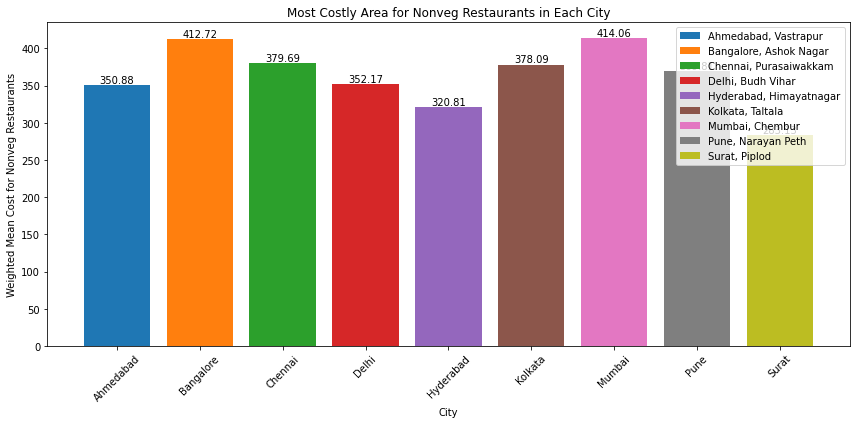

In [44]:
unique_cities = df['city'].unique()

# Initialize empty lists to store the most costly areas for Nonveg restaurants
most_costly_nonveg_areas = []

# Loop through each city and find the most costly area for Nonveg restaurants
for city_name in unique_cities:
    # Filter the data for the current city
    city_data = df[df['city'] == city_name]
    
    # Filter data for Nonveg restaurants in the city
    nonveg_city_data = city_data[city_data['veg'] == 0]
    
    if len(nonveg_city_data) == 0:
        # Skip if there are no Nonveg restaurants in the city
        continue

    # Calculate the weighted mean cost for Nonveg restaurants in each area
    nonveg_city_data['weighted_cost'] = nonveg_city_data['costForTwo'].mean()

    # Identify the area with the highest weighted mean cost for Nonveg restaurants
    most_costly_area_nonveg = nonveg_city_data['weighted_cost'].idxmax()
    
    # Store the city and area with the highest weighted mean cost
    most_costly_nonveg_areas.append((city_name, nonveg_city_data.loc[most_costly_area_nonveg]))

# Create a bar plot for the most costly areas for Nonveg restaurants
plt.figure(figsize=(12, 6))

for city_name, area_data in most_costly_nonveg_areas:
    # Extract the area and weighted_cost from the area_data dictionary
    area_name = area_data['area']
    weighted_cost = area_data['weighted_cost']
    
    # Plot the weighted mean cost for Nonveg restaurants in each city
    plt.bar(city_name, weighted_cost, label=f'{city_name}, {area_name}')
    
    # Set the cost as the Y-axis label
    plt.text(city_name, weighted_cost, f'{weighted_cost:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Weighted Mean Cost for Nonveg Restaurants')
plt.title('Most Costly Area for Nonveg Restaurants in Each City')
plt.legend()

# Print the details
for city_name, area_data in most_costly_nonveg_areas:
    area_name = area_data['area']
    weighted_cost = area_data['weighted_cost']
    
    print(f"City: {city_name}")
    print(f"Most Costly Area for Nonveg Restaurants: {area_name}")
    print(f"Weighted Mean Cost for Nonveg Restaurants: {weighted_cost:.2f}")
    print("-" * 40)  # Separate city results

plt.tight_layout()
plt.show()

C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\2513947966.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonveg_city_data['weighted_cost'] = nonveg_city_data['costForTwo'].mean()
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\2513947966.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonveg_city_data['weighted_cost'] = nonveg_city_data['costForTwo'].mean()
C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_23260\2513947966.py:19: SettingWithCopyWarning: 
A value is trying t

City: Ahmedabad
Most Costly Area for veg Restaurants: Ellisbridge
Weighted Mean Cost for veg Restaurants: 288.78
----------------------------------------
City: Bangalore
Most Costly Area for veg Restaurants: Gandhi Nagar
Weighted Mean Cost for veg Restaurants: 285.77
----------------------------------------
City: Chennai
Most Costly Area for veg Restaurants: Egmore
Weighted Mean Cost for veg Restaurants: 278.41
----------------------------------------
City: Delhi
Most Costly Area for veg Restaurants: Sector 4 Rohini
Weighted Mean Cost for veg Restaurants: 273.57
----------------------------------------
City: Hyderabad
Most Costly Area for veg Restaurants: New Nallakunta
Weighted Mean Cost for veg Restaurants: 240.05
----------------------------------------
City: Kolkata
Most Costly Area for veg Restaurants: Jorasanko
Weighted Mean Cost for veg Restaurants: 286.85
----------------------------------------
City: Mumbai
Most Costly Area for veg Restaurants: Kurla
Weighted Mean Cost for veg

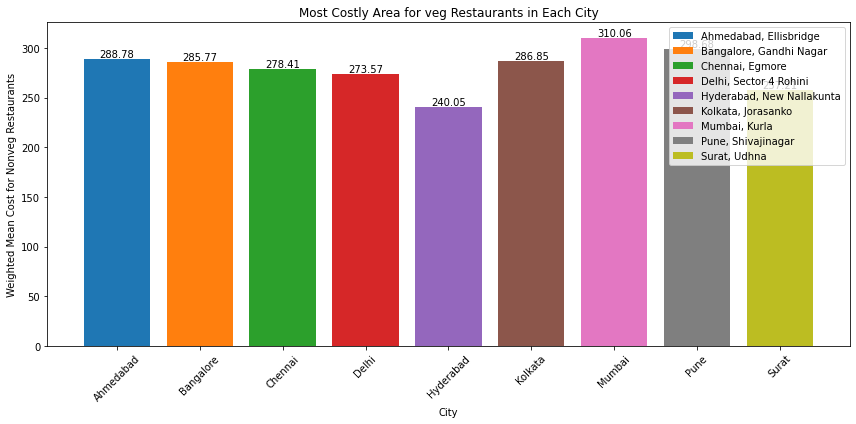

In [45]:
unique_cities = df['city'].unique()

# Initialize empty lists to store the most costly areas for Nonveg restaurants
most_costly_nonveg_areas = []

# Loop through each city and find the most costly area for Nonveg restaurants
for city_name in unique_cities:
    # Filter the data for the current city
    city_data = df[df['city'] == city_name]
    
    # Filter data for Nonveg restaurants in the city
    nonveg_city_data = city_data[city_data['veg'] == 1]
    
    if len(nonveg_city_data) == 0:
        # Skip if there are no Nonveg restaurants in the city
        continue

    # Calculate the weighted mean cost for Nonveg restaurants in each area
    nonveg_city_data['weighted_cost'] = nonveg_city_data['costForTwo'].mean()

    # Identify the area with the highest weighted mean cost for Nonveg restaurants
    most_costly_area_nonveg = nonveg_city_data['weighted_cost'].idxmax()
    
    # Store the city and area with the highest weighted mean cost
    most_costly_nonveg_areas.append((city_name, nonveg_city_data.loc[most_costly_area_nonveg]))

# Create a bar plot for the most costly areas for Nonveg restaurants
plt.figure(figsize=(12, 6))

for city_name, area_data in most_costly_nonveg_areas:
    # Extract the area and weighted_cost from the area_data dictionary
    area_name = area_data['area']
    weighted_cost = area_data['weighted_cost']
    
    # Plot the weighted mean cost for Nonveg restaurants in each city
    plt.bar(city_name, weighted_cost, label=f'{city_name}, {area_name}')
    
    # Set the cost as the Y-axis label
    plt.text(city_name, weighted_cost, f'{weighted_cost:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Weighted Mean Cost for Nonveg Restaurants')
plt.title('Most Costly Area for veg Restaurants in Each City')
plt.legend()

# Print the details
for city_name, area_data in most_costly_nonveg_areas:
    area_name = area_data['area']
    weighted_cost = area_data['weighted_cost']
    
    print(f"City: {city_name}")
    print(f"Most Costly Area for veg Restaurants: {area_name}")
    print(f"Weighted Mean Cost for veg Restaurants: {weighted_cost:.2f}")
    print("-" * 40)  # Separate city results

plt.tight_layout()
plt.show()

City: Ahmedabad, Average Delivery Time: 44.69 minutes, Percentage around Average: 40.19%
City: Bangalore, Average Delivery Time: 50.53 minutes, Percentage around Average: 40.80%
City: Chennai, Average Delivery Time: 58.97 minutes, Percentage around Average: 25.14%
City: Delhi, Average Delivery Time: 50.77 minutes, Percentage around Average: 29.58%
City: Hyderabad, Average Delivery Time: 49.93 minutes, Percentage around Average: 18.98%
City: Kolkata, Average Delivery Time: 67.81 minutes, Percentage around Average: 24.59%
City: Mumbai, Average Delivery Time: 48.32 minutes, Percentage around Average: 43.51%
City: Pune, Average Delivery Time: 55.82 minutes, Percentage around Average: 23.28%
City: Surat, Average Delivery Time: 48.48 minutes, Percentage around Average: 33.59%


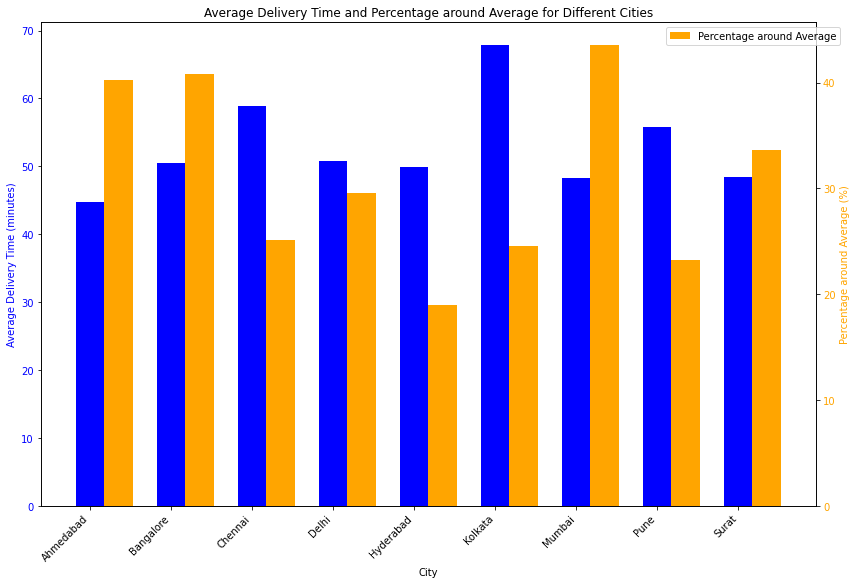

In [46]:
def Average_Delivery_Time(city):
    data = df[df['city'] == city]
    average_delivery_time = data['deliveryTime'].mean()
    total_restaurants = len(data)
    time_window = 5

    around_avg_delivery_time = data[(data['deliveryTime'] >= (average_delivery_time - time_window)) & (data['deliveryTime'] <= (average_delivery_time + time_window))]
    percentage_around_avg = (len(around_avg_delivery_time) / total_restaurants) * 100

    return city, average_delivery_time, percentage_around_avg

# Collect data for all cities
city_data = [Average_Delivery_Time(city) for city in df['city'].unique()]

# Print the information
for city, avg_time, percentage in city_data:
    print(f'City: {city}, Average Delivery Time: {avg_time:.2f} minutes, Percentage around Average: {percentage:.2f}%')

# Plotting
cities, avg_times, percentages = zip(*city_data)
bar_width = 0.35
index = np.arange(len(cities))

fig, ax1 = plt.subplots(figsize=(12, 8))

bar1 = ax1.bar(index, avg_times, bar_width, label='Average Delivery Time', color='blue')
ax1.set_xlabel('City')
ax1.set_ylabel('Average Delivery Time (minutes)', color='blue')
ax1.set_xticks(index)
ax1.set_xticklabels(cities, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width, percentages, bar_width, label='Percentage around Average', color='orange')
ax2.set_ylabel('Percentage around Average (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Average Delivery Time and Percentage around Average for Different Cities')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.0))

plt.show()